# Exploratory Data Analysis

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 2.6 MB/s 
     |████████████████████████████████| 6.3 MB 30.0 MB/s 
     |████████████████████████████████| 15.4 MB 35 kB/s 


In [ ]:
!pip install geopy

In [ ]:
!pip install pygeos

     |████████████████████████████████| 2.1 MB 3.1 MB/s 


In [ ]:
!pip install geojson

In [ ]:
!sudo apt install libspatialindex-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 1s (628 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.

In [ ]:
!sudo pip3 install rtree

     |████████████████████████████████| 994 kB 3.3 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.offline as py
import plotly.graph_objs as go

import geopandas as gpd
import geopy as gp
import shapely
import geojson
import rtree
import pygeos
import fiona

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.



In [ ]:
from shapely.geometry import MultiPolygon
from shapely.geometry import shape

In [ ]:
!pwd

/content


In [ ]:
fiona.drvsupport.supported_drivers['kml'] = 'rw' # enable KML support
fiona.drvsupport.supported_drivers['KML'] = 'rw'
from zipfile import ZipFile

In [ ]:
!pip install -U notebook-as-pdf
!pyppeteer-install

[W:pyppeteer.chromium_downloader] Starting Chromium download. Download may take a few minutes.
100% 109M/109M [00:02<00:00, 53.6Mb/s]
[W:pyppeteer.chromium_downloader] Chromium download done.
[W:pyppeteer.chromium_downloader] chromium extracted to: /root/.local/share/pyppeteer/local-chromium/588429


## OpenStreetMaps

In [ ]:
!pip install overpy

In [ ]:
import overpy
api = overpy.Overpass()

In [ ]:
r = api.query("""
[out:json];

area[name="Chicago"]->.a;

( node(area.a)[amenity=hospital];
);

out;
""")



## Boundaries - Census Blocks 2010

In [ ]:
url = 'https://data.cityofchicago.org/resource/bt9m-d2mf.json'
blocks = pd.read_json(url)

In [ ]:
blocks['the_geom'].head()

0    {'type': 'MultiPolygon', 'coordinates': [[[[-8...
1    {'type': 'MultiPolygon', 'coordinates': [[[[-8...
2    {'type': 'MultiPolygon', 'coordinates': [[[[-8...
3    {'type': 'MultiPolygon', 'coordinates': [[[[-8...
4    {'type': 'MultiPolygon', 'coordinates': [[[[-8...
Name: the_geom, dtype: object

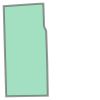

In [ ]:
shape(blocks['the_geom'][1])

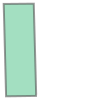

In [ ]:
shape(blocks['the_geom'][45])

In [ ]:
new_geom = []
for index, row in blocks.iterrows():
  new_geom.append(shape(row['the_geom']))
new_geom = pd.DataFrame(new_geom)
new_geom
blocks['the_geom'] = new_geom

In [ ]:
blocks_geo = gpd.GeoDataFrame(blocks).set_geometry('the_geom')

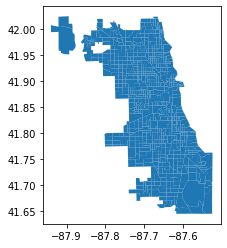

In [ ]:
chicago = gpd.read_file('chicago.shp')
chicago.plot()

## Parks

In [ ]:
url = 'https://data.cityofchicago.org/resource/2eaw-bdhe.json'
parks = pd.read_json(url)

In [ ]:
parks.head()

,park_name,bowling_green,gymnastic_centers,:@computed_region_43wa_7qmu,band_shell,wheelchair_accessible_ball_fields,boat_slips,volleyball_sand,park_class,alfred_caldwell_lily_pond,location,lagoon,casting_area,nature_center,sport_roller_courts,baseball_jr_softball_t_ball,baseball_sr,baseball_batting_cages,sled_hill,wetland_area,fitness_center,bocce_court,pool_indoor,cultural_center,carousel,water_playground,community_garden,gymnasium,golf_putting_greens,skate_park,acres,gallery,cricket_field,model_train_display,boat_launch_non_motorized,rowing_club,pool_outdoor,:@computed_region_rpca_8um6,basketball_backboards,shuffleboard,...,pavillion,conservatory,handball_raquetball_court,horseshoe_courts,boat_launch_motorized,ice_skating,ward,model_yacht_basin,zip,tennis_courts,beach,street_address,golf_course,chess_pavillion,spray_feature,golf_course_miniature,basketball_courts,handball,zoo,football_soccer_combo,water_slide,senior_center,:@computed_region_bdys_3d7i,mountain_bike_trail,:@computed_region_6mkv_f3dw,park_number,dog_friendly,playground_park,artificial_turf_fields,boxing_center,playground,label,fitness_courses,track,garden,golf_driving_range,archery_range,:@computed_region_vrxf_vc4k,volleyball,croquet
0,MCKEON (JOSEPH),0,0,48.0,0,0,0,0,MINI-PARK,0,"{'latitude': '41.82903552510654', 'human_addre...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.40,0,0,0,0,0,0,37.0,0,0,...,0,0,0,0,0,0,11,0,60609.0,0,0,600 W 36TH ST,0,0,0,0,0,0,0,0,0,0,172.0,0,14924.0,1162,0,1,0,0,0,McKeon,0,0,0,0,0,58.0,0,0
1,OHIO,0,0,23.0,0,0,0,0,MINI-PARK,0,"{'latitude': '41.89145773962588', 'human_addre...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.42,0,0,0,0,0,0,32.0,2,0,...,0,0,0,0,0,0,37,0,60644.0,0,0,4712 W OHIO ST,0,0,1,0,1,0,0,0,0,0,695.0,0,22216.0,1139,0,0,0,0,1,Ohio,0,0,0,0,0,26.0,0,0
2,ALTGELD (JOHN),0,0,23.0,0,0,0,0,COMMUNITY PARK,0,"{'latitude': '41.87472755936259', 'human_addre...",0,0,0,0,3,1,0,0,0,1,0,0,0,0,0,0,1,0,0,4.32,0,0,0,0,0,1,28.0,2,0,...,0,0,0,0,0,0,27,0,60612.0,0,0,515 S WASHTENAW AVE,0,0,0,0,1,0,0,1,0,0,38.0,0,21184.0,206,0,0,0,0,1,Altgeld,0,0,0,0,0,28.0,0,0
3,PARK NO. 468,0,0,15.0,0,0,0,0,UNIMPROVED PARK,0,"{'latitude': '41.791344140064204', 'human_addr...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.32,0,0,0,0,0,0,58.0,0,0,...,0,0,0,0,0,0,13,0,60629.0,0,0,4556 W 56TH ST,0,0,0,0,0,0,0,0,0,0,773.0,0,21867.0,468,0,0,0,0,0,Park No. 468,0,0,0,0,0,60.0,0,0
4,RAINEY (EDWARD),0,0,30.0,0,0,0,0,REGIONAL PARK,0,"{'latitude': '41.749472777639994', 'human_addr...",0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,18.31,0,0,0,0,0,0,8.0,0,0,...,0,0,0,0,0,0,13,0,60652.0,3,0,4350 W 79TH ST,0,0,0,0,0,0,0,1,0,0,571.0,0,4300.0,33,0,0,0,0,1,Rainey,0,0,0,0,0,69.0,1,0


In [ ]:
parks["location"][0]

{'human_address': '{"address": "600 W 36TH ST", "city": "", "state": "", "zip": "60609"}',
 'latitude': '41.82903552510654',
 'longitude': '-87.64121494764093',
 'needs_recoding': False}

In [ ]:
n_parks = parks.shape[0]

In [ ]:
lat_col = []
lon_col = []
for i in range(n_parks):
  location = parks.location[i]
  try:
    #print(location['latitude'])
    lat_col.append(location['latitude'])
    lon_col.append(location['longitude'])
  except:
    lat_col.append(np.nan)
    lon_col.append(np.nan)

In [ ]:
parks['latitude'] = lat_col
parks['longitude'] = lon_col

In [ ]:
parks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 83 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   park_name                          581 non-null    object 
 1   bowling_green                      581 non-null    int64  
 2   gymnastic_centers                  581 non-null    int64  
 3   :@computed_region_43wa_7qmu        577 non-null    float64
 4   band_shell                         581 non-null    int64  
 5   wheelchair_accessible_ball_fields  581 non-null    int64  
 6   boat_slips                         581 non-null    int64  
 7   volleyball_sand                    581 non-null    int64  
 8   park_class                         581 non-null    object 
 9   alfred_caldwell_lily_pond          581 non-null    int64  
 10  location                           580 non-null    object 
 11  lagoon                             581 non-null    int64  

In [ ]:
parks.describe()

,bowling_green,gymnastic_centers,:@computed_region_43wa_7qmu,band_shell,wheelchair_accessible_ball_fields,boat_slips,volleyball_sand,alfred_caldwell_lily_pond,lagoon,casting_area,nature_center,sport_roller_courts,baseball_jr_softball_t_ball,baseball_sr,baseball_batting_cages,sled_hill,wetland_area,fitness_center,bocce_court,pool_indoor,cultural_center,carousel,water_playground,community_garden,gymnasium,golf_putting_greens,skate_park,acres,gallery,cricket_field,model_train_display,boat_launch_non_motorized,rowing_club,pool_outdoor,:@computed_region_rpca_8um6,basketball_backboards,shuffleboard,:@computed_region_awaf_s7ux,pavillion,conservatory,handball_raquetball_court,horseshoe_courts,boat_launch_motorized,ice_skating,ward,model_yacht_basin,zip,tennis_courts,beach,golf_course,chess_pavillion,spray_feature,golf_course_miniature,basketball_courts,handball,zoo,football_soccer_combo,water_slide,senior_center,:@computed_region_bdys_3d7i,mountain_bike_trail,:@computed_region_6mkv_f3dw,park_number,dog_friendly,playground_park,artificial_turf_fields,boxing_center,playground,fitness_courses,track,garden,golf_driving_range,archery_range,:@computed_region_vrxf_vc4k,volleyball,croquet
count,581.000000,581.000000,577.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,577.000000,581.000000,581.000000,577.000000,581.0,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,580.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,577.000000,581.000000,577.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,577.000000,581.000000,581.000000
mean,0.003442,0.013769,26.131716,0.001721,0.003442,0.166954,0.058520,0.001721,0.030981,0.020654,0.001721,0.029260,0.958692,0.277108,0.003442,0.001721,0.008606,0.129088,0.020654,0.046472,0.012048,0.001721,0.034423,0.039587,0.247849,0.005164,0.008606,14.104458,0.005164,0.006885,0.001721,0.008606,0.001721,0.086059,28.365685,1.354561,0.022375,26.521664,0.0,0.003442,0.001721,0.123924,0.005164,0.013769,24.648881,0.001721,60628.951724,0.986231,0.046472,0.012048,0.003442,0.330465,0.001721,0.573150,0.018933,0.001721,0.449225,0.008606,0.005164,410.020797,0.001721,18959.109185,577.808950,0.027539,0.230637,0.048193,0.017212,0.662651,0.005164,0.046472,0.032702,0.005164,0.001721,37.076256,0.036145,0.003442
std,0.082974,0.116633,14.537905,0.041487,0.058621,3.737694,0.255998,0.041487,0.209442,0.142346,0.041487,0.168679,1.862983,0.646457,0.058621,0.041487,0.092447,0.335586,0.202366,0.210686,0.109195,0.041487,0.182471,0.195155,0.477619,0.071734,0.092447,68.827237,0.071734,0.165948,0.041487,0.092447,0.041487,0.280692,18.195783,2.295032,0.323529,15.472869,0.0,0.058621,0.041487,0.668345,0.071734,0.116633,15.448266,0.041487,15.110225,2.656122,0.331520,0.109195,0.058621,0.492269,0.041487,0.957854,0.206747,0.041487,0.994599,0.092447,0.071734,234.926820,0.041487,5846.645520,413.824975,0.192799,0.421603,0.258145,0.130172,0.807166,0.071734,0.210686,0.205017,0.071734,0.041487,22.088075,0.195823,0.058621
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60602.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4299.000000,2.000000

In [ ]:
parks.isnull().sum()

park_name                      0
bowling_green                  0
gymnastic_centers              0
:@computed_region_43wa_7qmu    4
band_shell                     0
                              ..
:@computed_region_vrxf_vc4k    4
volleyball                     0
croquet                        0
latitude                       4
longitude                      4
Length: 83, dtype: int64

In [ ]:
location_null = parks['location'].isnull().sum()
print(location_null)
location_null_array = []
location_null_array.append(location_null)

1


In [ ]:
parks_geo = gpd.GeoDataFrame(parks, geometry = gpd.points_from_xy(parks.longitude, parks.latitude))

Text(0.5, 1.0, 'Parks in Chicago')

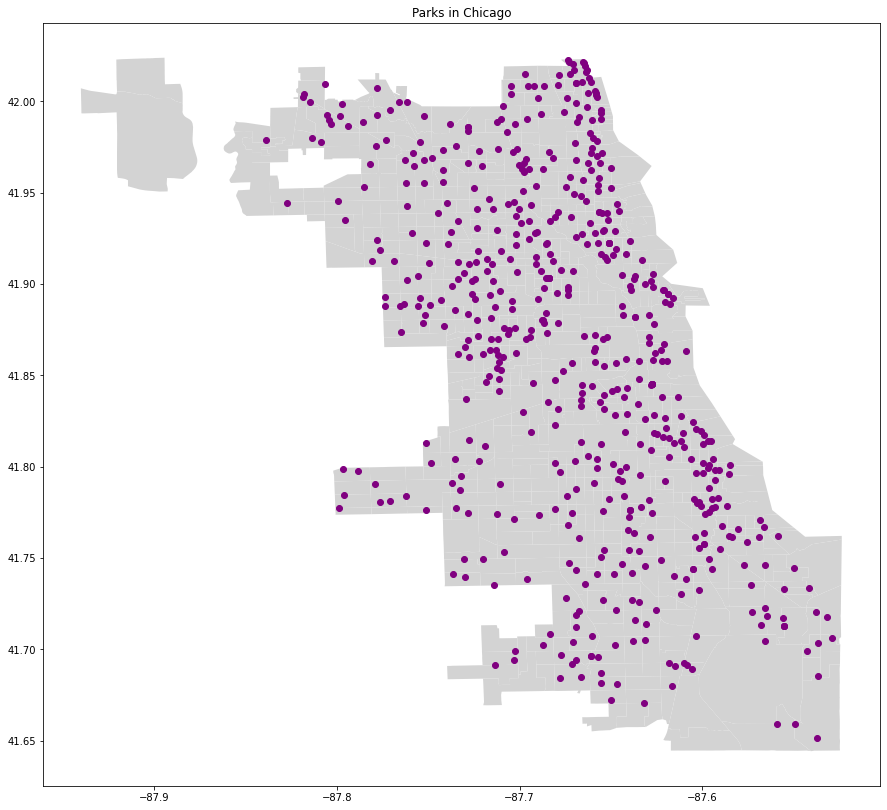

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
parks_geo.plot(ax = ax, color = 'purple')
ax.set_title('Parks in Chicago')

## Crime

In [ ]:
url = "https://data.cityofchicago.org/resource/dfnk-7re6.json"
crime = pd.read_json(url)

In [ ]:
crime.tail()

,:@computed_region_43wa_7qmu,location,case_,date_of_occurrence,block,y_coordinate,_primary_decsription,latitude,fbi_cd,:@computed_region_awaf_s7ux,_secondary_description,x_coordinate,ward,_location_description,domestic,longitude,:@computed_region_bdys_3d7i,beat,_iucr,:@computed_region_6mkv_f3dw,arrest,:@computed_region_vrxf_vc4k
995,22.0,"{'latitude': '41.671609543', 'human_address': ...",JE384783,2021-09-11T03:00:00.000,122XX S ABERDEEN ST,1823669.0,OFFENSE INVOLVING CHILDREN,41.671610,02,45.0,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,1171210.0,34,RESIDENCE,Y,-87.649016,662.0,524,1754,22212.0,N,50.0
996,10.0,"{'latitude': '41.869285324', 'human_address': ...",JE378865,2021-09-18T13:00:00.000,0000X E 11TH ST,1895753.0,THEFT,41.869285,06,48.0,FROM BUILDING,1177109.0,4,HOTEL / MOTEL,N,-87.625254,368.0,123,0890,14913.0,N,38.0
997,49.0,"{'latitude': '41.907371269', 'human_address': ...",JE381213,2021-09-18T00:00:00.000,032XX W BEACH AVE,1909457.0,CRIMINAL DAMAGE,41.907371,14,10.0,TO VEHICLE,1154547.0,26,STREET,N,-87.707718,455.0,1422,1320,4299.0,N,24.0
998,37.0,"{'latitude': '41.744647338', 'human_address': ...",JE377917,2021-09-18T00:57:00.000,029XX E 83RD ST,1850508.0,BATTERY,41.744647,04B,47.0,AGGRAVATED - HANDGUN,1197409.0,7,STREET,N,-87.552238,505.0,424,041A,21202.0,N,42.0
999,8.0,"{'latitude': '41.811191128', 'human_address': ...",JE379930,2021-09-18T18:00:00.000,045XX S SAWYER AVE,1874414.0,OFFENSE INVOLVING CHILDREN,41.811191,08B,49.0,CHILD ABUSE,1155458.0,14,APARTMENT,N,-87.705313,640.0,821,1750,22248.0,N,55.0


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   :@computed_region_43wa_7qmu  961 non-null    float64 
 1   location                     963 non-null    object  
 2   case_                        1000 non-null   object  
 3   date_of_occurrence           1000 non-null   object  
 4   block                        1000 non-null   object  
 5   y_coordinate                 963 non-null    float64 
 6   _primary_decsription         1000 non-null   object  
 7   latitude                     963 non-null    float64 
 8   fbi_cd                       1000 non-null   object  
 9   :@computed_region_awaf_s7ux  958 non-null    float64 
 10  _secondary_description       1000 non-null   object  
 11  x_coordinate                 963 non-null    float64 
 12  ward                         1000 non-null   int64   
 13  _loc

In [ ]:
crime.describe()

,:@computed_region_43wa_7qmu,y_coordinate,latitude,:@computed_region_awaf_s7ux,x_coordinate,ward,longitude,:@computed_region_bdys_3d7i,beat,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k
count,961.000000,9.630000e+02,963.000000,958.000000,9.630000e+02,1000.000000,963.000000,961.000000,1000.000000,963.000000,961.000000
mean,25.965661,1.885372e+06,41.841060,27.713987,1.164498e+06,23.499000,-87.671891,377.221644,1165.743000,19202.454829,39.236212
std,14.065763,3.276952e+04,0.090119,15.483892,1.647244e+04,13.678051,0.059933,231.818921,691.505033,5673.699800,20.379406
min,1.000000,1.817292e+06,41.653793,1.000000,1.100317e+06,1.000000,-87.906463,1.000000,111.000000,4299.000000,1.000000
25%,14.000000,1.857364e+06,41.764025,13.000000,1.153285e+06,11.000000,-87.712496,166.000000,612.000000,21186.000000,25.000000
50%,27.000000,1.889117e+06,41.851079,28.000000,1.165647e+06,23.000000,-87.667699,377.000000,1023.500000,21560.000000,37.000000
75%,37.000000,1.910258e+06,41.909849,42.000000,1.176352e+06,34.000000,-87.629230,574.000000,1713.000000,22216.000000,59.000000
max,50.000000,1.951492e+06,42.022526,53.000000,1.203836e+06,50.000000,-87.529242,801.000000,2535.000000,22620.000000,76.000000


In [ ]:
location_null = crime['location'].isnull().sum()
print(location_null)
location_null_array.append(location_null)

37


In [ ]:
crime.isnull().sum()

:@computed_region_43wa_7qmu    39
location                       37
case_                           0
date_of_occurrence              0
block                           0
y_coordinate                   37
_primary_decsription            0
latitude                       37
fbi_cd                          0
:@computed_region_awaf_s7ux    42
_secondary_description          0
x_coordinate                   37
ward                            0
_location_description           1
domestic                        0
longitude                      37
:@computed_region_bdys_3d7i    39
beat                            0
_iucr                           0
:@computed_region_6mkv_f3dw    37
arrest                          0
:@computed_region_vrxf_vc4k    39
dtype: int64

In [ ]:
crime_geo = gpd.GeoDataFrame(crime, geometry = gpd.points_from_xy(crime.longitude, crime.latitude))

Text(0.5, 1.0, 'Crime in Chicago')

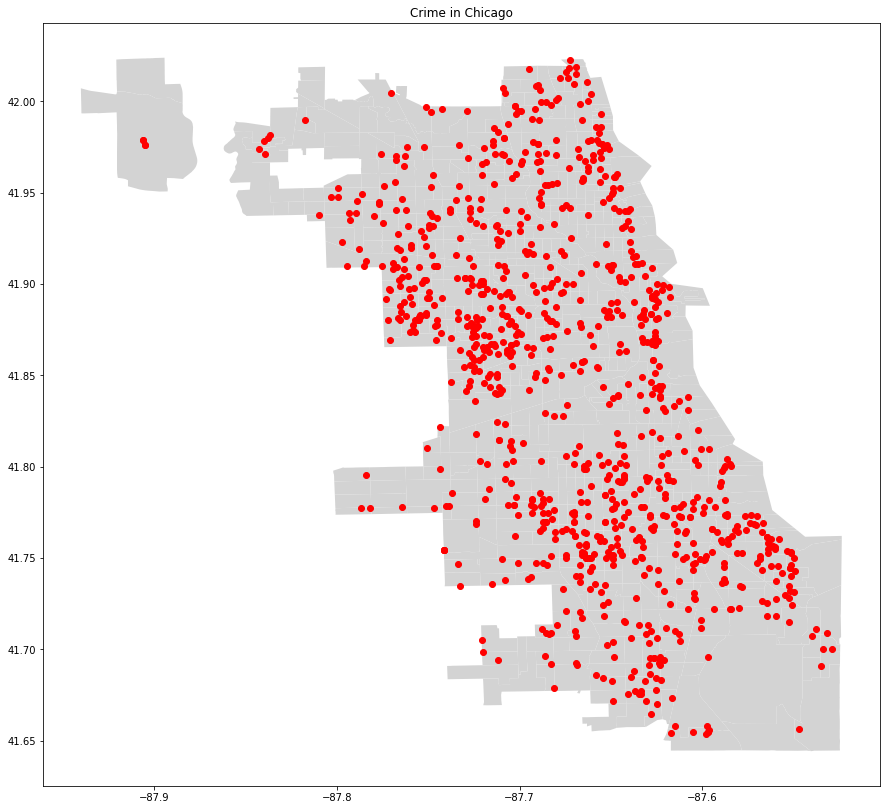

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
crime_geo.plot(ax = ax, color = 'r')
ax.set_title('Crime in Chicago')

## Energy use

In [ ]:
url = "https://data.cityofchicago.org/resource/jn94-it7m.json"
energy_use = pd.read_json(url)

In [ ]:
energy_use.head()

,location,benchmarking_id,address,chicago_energy_rating,latitude,exempt_from_chicago_energy_rating,community_area,longitude,property_name,data_year,reporting_status,zip_code,number_of_buildings,primary_property_type_epa_calculated,site_eui_kbtu_sq_ft,property_gross_floor_area_epa_calculated_buildings_sq_ft,natural_gas_use_kbtu,year_built,electricity_use_grid_purchase_and_generated_from_onsite_renewable_systems_kbtu,energy_star_score,weather_normalized_site_eui_kbtu_sq_ft,source_eui_kbtu_sq_ft,water_use_kgal,total_ghg_emissions_metric_tons_co2e,ghg_intensity_metric_tons_co2e_sq_ft,district_chilled_water_use_kbtu,district_steam_use_kbtu
0,"{'latitude': '41.70649646', 'needs_recoding': ...",159005,821 E 103rd St,0.0,41.706496,False,PULLMAN,-87.602690,Corliss HS -CPS,2019,Not Submitted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'latitude': '41.886495', 'needs_recoding': Fa...",256568,363 E Wacker Dr,0.0,41.886495,False,Loop,-87.618105,Vista Tower,2019,Not Submitted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'latitude': '41.75582921', 'needs_recoding': ...",100393,7601 S Cicero Ave,NaN,41.755829,True,WEST LAWN,-87.736993,Ford City Mall,2019,Submitted,60652,1.0,Enclosed Mall,144.1,864923.0,11780942.4,1950.0,112895334.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'latitude': '41.75629268', 'needs_recoding': ...",100395,7500 S Pulaski Ave,0.0,41.756293,False,WEST LAWN,-87.722240,Daley,2019,Not Submitted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'latitude': '42.01036185', 'needs_recoding': ...",100984,1604 1610 W SHERWIN AVE,0.0,42.010362,False,ROGERS PARK,-87.668298,1604 1610 W SHERWIN AVE,2019,Not Submitted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
energy_use.describe()

,benchmarking_id,chicago_energy_rating,latitude,longitude,data_year,number_of_buildings,site_eui_kbtu_sq_ft,property_gross_floor_area_epa_calculated_buildings_sq_ft,natural_gas_use_kbtu,year_built,electricity_use_grid_purchase_and_generated_from_onsite_renewable_systems_kbtu,energy_star_score,weather_normalized_site_eui_kbtu_sq_ft,source_eui_kbtu_sq_ft,water_use_kgal,total_ghg_emissions_metric_tons_co2e,ghg_intensity_metric_tons_co2e_sq_ft,district_chilled_water_use_kbtu,district_steam_use_kbtu
count,1000.000000,920.000000,998.000000,998.000000,1000.0,677.000000,720.000000,6.830000e+02,6.490000e+02,683.000000,7.200000e+02,614.00000,434.000000,440.000000,1.040000e+02,395.000000,395.000000,2.200000e+01,9.000000e+00
mean,114422.582000,2.130435,41.887645,-87.651950,2019.0,1.290990,101.764583,3.610282e+05,1.601003e+07,1962.579795,1.972475e+07,60.90228,102.481106,186.392045,4.991416e+05,4416.759494,10.820506,3.301482e+07,2.759796e+07
std,22403.749921,1.559431,0.067753,0.044804,0.0,2.700996,76.035867,6.578861e+05,4.015014e+07,34.498553,5.513759e+07,26.02791,82.153483,166.535880,3.887669e+06,12958.839127,10.133400,7.758904e+07,4.134044e+07
min,100001.000000,0.000000,41.651404,-87.844645,2019.0,1.000000,13.700000,3.845600e+04,5.300000e+03,1884.000000,5.379790e+04,1.00000,14.600000,19.300000,9.000000e-01,66.000000,1.000000,1.558674e+06,8.347135e+05
25%,102279.750000,0.000000,41.868632,-87.666568,2019.0,1.000000,63.075000,6.954300e+04,3.434230e+06,1928.000000,1.592464e+06,43.25000,63.200000,110.600000,1.929650e+03,540.650000,6.200000,7.742332e+06,4.959146e+06
50%,105988.000000,2.500000,41.887967,-87.638730,2019.0,1.000000,86.500000,1.188900e+05,5.877200e+06,1970.000000,3.965548e+06,66.00000,85.150000,146.900000,4.402050e+03,1155.800000,8.400000,1.331004e+07,1.005348e+07
75%,118746.750000,3.500000,41.934738,-87.627286,2019.0,1.000000,111.825000,3.758525e+05,1.221976e+07,1991.500000,1.514584e+07,81.75000,110.100000,205.225000,1.259015e+04,3400.550000,11.950000,2.619136e+07,2.322449e+07
max,256571.000000,4.000000,42.017989,-87.545829,2019.0,57.000000,1122.600000,9.245333e+06,4.730932e+08,2018.000000,9.923283e+08,100.00000,1122.900000,2556.600000,3.787893e+07,185162.100000,151.500000,3.762233e+08,1.306069e+08


In [ ]:
energy_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                                                          Non-Null Count  Dtype   
---  ------                                                                          --------------  -----   
 0   location                                                                        998 non-null    object  
 1   benchmarking_id                                                                 1000 non-null   int64   
 2   address                                                                         1000 non-null   object  
 3   chicago_energy_rating                                                           920 non-null    float64 
 4   latitude                                                                        998 non-null    float64 
 5   exempt_from_chicago_energy_rating                                               1000 non-null   bool    
 6   community

In [ ]:
location_null = energy_use['latitude'].isnull().sum()
print(location_null)
location_null_array.append(location_null)

2


In [ ]:
energy_use.isnull().sum()

location                                                                            2
benchmarking_id                                                                     0
address                                                                             0
chicago_energy_rating                                                              80
latitude                                                                            2
exempt_from_chicago_energy_rating                                                   0
community_area                                                                      2
longitude                                                                           2
property_name                                                                      14
data_year                                                                           0
reporting_status                                                                    0
zip_code                                              

In [ ]:
energy_geo = gpd.GeoDataFrame(energy_use, geometry = gpd.points_from_xy(energy_use.longitude, energy_use.latitude))

Text(0.5, 1.0, 'Energy consumption points in Chicago')

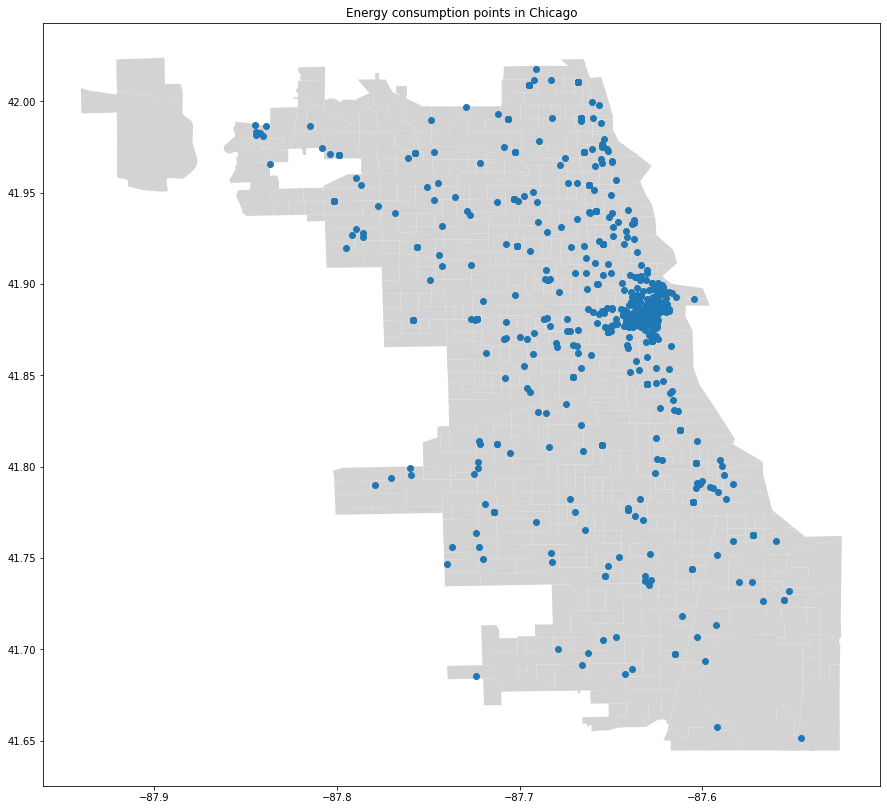

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
energy_geo.plot(ax = ax)
ax.set_title('Energy consumption points in Chicago')

## Traffic

In [ ]:
url = "https://data.cityofchicago.org/resource/pf56-35rv.json"
traffic = pd.read_json(url)

In [ ]:
traffic.head()

,:@computed_region_43wa_7qmu,location,vehicle_volume_by_each_direction_of_traffic,date_of_count,:@computed_region_rpca_8um6,latitude,:@computed_region_awaf_s7ux,total_passing_vehicle_volume,traffic_volume_count_location_address,longitude,:@computed_region_bdys_3d7i,:@computed_region_6mkv_f3dw,street,:@computed_region_vrxf_vc4k,id
0,7.0,"{'latitude': '41.887904', 'needs_recoding': Fa...",East Bound: 3600 / West Bound: 3500,2006-11-14T08:00:00.000Z,32.0,41.887904,52.0,7100,5838 West,-87.771064,672.0,22216,Lake St,26.0,414
1,32.0,"{'latitude': '41.756542', 'needs_recoding': Fa...",East Bound: 3800 / West Bound: 4800,2006-03-28T08:00:00.000Z,61.0,41.756542,31.0,8600,320 East,-87.617335,475.0,21546,76th St,67.0,176
2,33.0,"{'latitude': '41.792663', 'needs_recoding': Fa...",East Bound: 27800 / West Bound: 25700,2006-08-24T07:00:00.000Z,60.0,41.792663,32.0,53500,1730 East,-87.582231,502.0,22260,57th Dr,8.0,1367
3,9.0,"{'latitude': '41.849302', 'needs_recoding': Fa...",East Bound: 400 / West Bound: 300,2006-03-30T08:00:00.000Z,40.0,41.849302,48.0,700,125 East,-87.622658,193.0,21194,24th St,34.0,316
4,47.0,"{'latitude': '41.659177', 'needs_recoding': Fa...",East Bound: 2300 / West Bound: 1900,2006-08-29T07:00:00.000Z,26.0,41.659177,47.0,4200,2924 East,-87.552112,586.0,22250,130th St,52.0,1294


In [ ]:
traffic.describe()

,:@computed_region_43wa_7qmu,:@computed_region_rpca_8um6,latitude,:@computed_region_awaf_s7ux,total_passing_vehicle_volume,longitude,:@computed_region_bdys_3d7i,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,id
count,988.000000,988.000000,1000.000000,988.000000,1000.0000,1000.000000,987.000000,1000.000000,988.000000,1000.000000
mean,26.825911,32.797571,41.848916,28.551619,19353.4000,-87.669101,369.873354,18451.654000,37.955466,699.205000
std,14.601358,17.527501,0.083795,14.929160,12598.7522,0.060184,237.819918,5737.033204,19.304630,397.998797
min,1.000000,1.000000,41.651861,1.000000,700.0000,-87.846567,1.000000,4299.000000,1.000000,1.000000
25%,13.000000,19.000000,41.779901,16.000000,11100.0000,-87.705867,131.000000,14920.000000,25.000000,359.500000
50%,28.000000,35.000000,41.870306,28.000000,17250.0000,-87.660975,368.000000,21538.000000,37.000000,694.500000
75%,38.000000,46.000000,41.908690,42.000000,24100.0000,-87.628254,579.000000,22212.000000,55.000000,1046.250000
max,50.000000,61.000000,42.017888,53.000000,165200.0000,-87.529702,800.000000,26633.000000,77.000000,1382.000000


In [ ]:
location_null = traffic['location'].isnull().sum()
print(location_null)
location_null_array.append(location_null)

0


In [ ]:
traffic.isnull().sum()

:@computed_region_43wa_7qmu                    12
location                                        0
vehicle_volume_by_each_direction_of_traffic     0
date_of_count                                   0
:@computed_region_rpca_8um6                    12
latitude                                        0
:@computed_region_awaf_s7ux                    12
total_passing_vehicle_volume                    0
traffic_volume_count_location_address           0
longitude                                       0
:@computed_region_bdys_3d7i                    13
:@computed_region_6mkv_f3dw                     0
street                                          0
:@computed_region_vrxf_vc4k                    12
id                                              0
dtype: int64

In [ ]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   :@computed_region_43wa_7qmu                  988 non-null    float64
 1   location                                     1000 non-null   object 
 2   vehicle_volume_by_each_direction_of_traffic  1000 non-null   object 
 3   date_of_count                                1000 non-null   object 
 4   :@computed_region_rpca_8um6                  988 non-null    float64
 5   latitude                                     1000 non-null   float64
 6   :@computed_region_awaf_s7ux                  988 non-null    float64
 7   total_passing_vehicle_volume                 1000 non-null   int64  
 8   traffic_volume_count_location_address        1000 non-null   object 
 9   longitude                                    1000 non-null   float64
 10  :

In [ ]:
traffic_geo = gpd.GeoDataFrame(traffic, geometry = gpd.points_from_xy(traffic.longitude, traffic.latitude))

Text(0.5, 1.0, 'Traffic in Chicago')

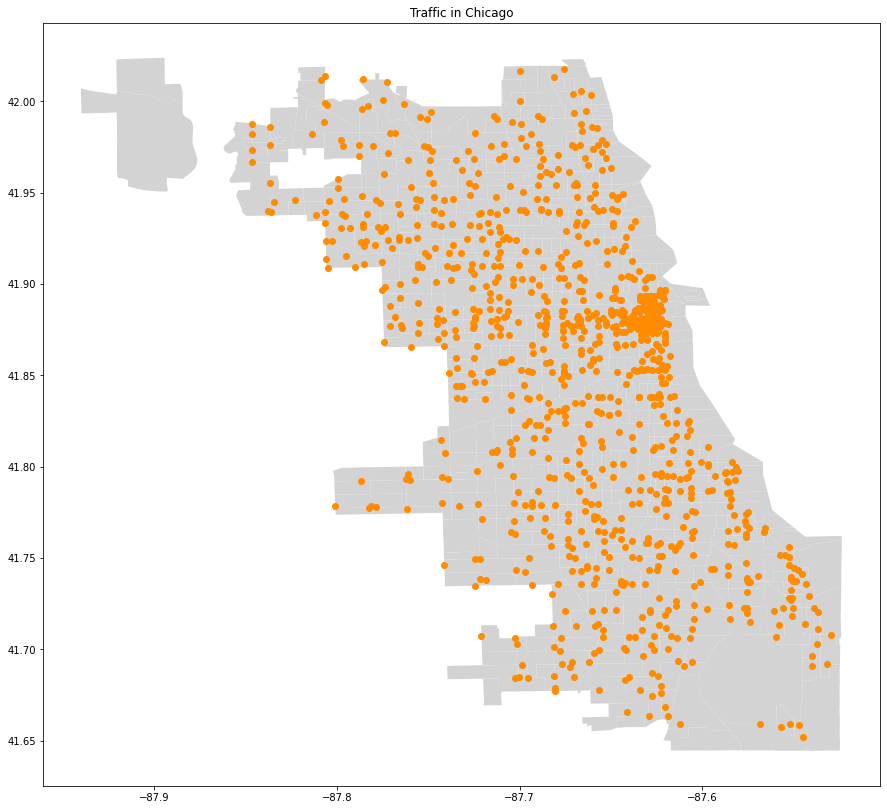

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
traffic_geo.plot(ax = ax, color='darkorange')
ax.set_title('Traffic in Chicago')

## Air quality

In [ ]:
url_air_quality = 'https://data.cityofchicago.org/resource/i9rk-duva.json'
air_quality = pd.read_json(url_air_quality)

In [ ]:
air_quality.head()

,inspection_number,modified_date,site_name,map_address,street_number,direction,street_name,street_type,inspection_type,inspection_sub_category,inspector,inspection_date,narrative,data_source,latitude,longitude,location,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,street_number_to
0,538874,2021-10-05T00:00:00.000,RELIABLE ASPHALT/MATERIALS,3741 S PULASKI RD,3741,S,PULASKI,RD,DOE WASTE HANDLING,SOLID WASTE INSPECTIONS,EN00114,2014-09-12T00:00:00.000,voids,DEPT. OF PUBLIC HEALTH,41.825320,-87.723960,"{'type': 'Point', 'coordinates': [-87.72395999...",56.0,32.0,21569.0,200.0,28.0,NaN
1,1728449,2021-10-05T00:00:00.000,PLANET RECOVERY TRANSFER STA,1800 W CARROLL AVE,1800,W,CARROLL,AVE,DOE WASTE HANDLING,SOLID WASTE INSPECTIONS,10937,2021-10-05T00:00:00.000,Allied Waste North America2400 S. LoomisChicag...,DEPT. OF PUBLIC HEALTH,41.887862,-87.672053,"{'type': 'Point', 'coordinates': [-87.67205276...",28.0,29.0,21184.0,579.0,46.0,NaN
2,1499317,2021-10-05T00:00:00.000,ORLANDI STATUARY COMPANY,1801 N CENTRAL PARK AVE,1801,N,CENTRAL PARK,AVE,DOE AIR QUALITY,AIR QUALITY INSPECTION,10937,2020-02-05T00:00:00.000,"1801 N. Central Park, Orlandi StatuaryEngineer...",DEPT. OF PUBLIC HEALTH,41.913715,-87.716514,"{'type': 'Point', 'coordinates': [-87.71651374...",1.0,23.0,22535.0,351.0,41.0,NaN
3,805497,2021-10-05T00:00:00.000,PLANET RECOVERY TRANSFER STA,1800 W CARROLL AVE,1800,W,CARROLL,AVE,DOE WASTE HANDLING,SOLID WASTE INSPECTIONS,10937,2016-01-08T00:00:00.000,Republic Services\n\n2400 S. Loomis\n\nChicago...,DEPT. OF PUBLIC HEALTH,41.887862,-87.672053,"{'type': 'Point', 'coordinates': [-87.67205276...",28.0,29.0,21184.0,579.0,46.0,NaN
4,688331,2021-10-05T00:00:00.000,PLANET RECOVERY TRANSFER STA,1800 W CARROLL AVE,1800,W,CARROLL,AVE,DOE WASTE HANDLING,SOLID WASTE INSPECTIONS,10937,2015-01-28T00:00:00.000,Republic Waste \n\nPlanet Recovery \n\n1750 W....,DEPT. OF PUBLIC HEALTH,41.887862,-87.672053,"{'type': 'Point', 'coordinates': [-87.67205276...",28.0,29.0,21184.0,579.0,46.0,NaN


In [ ]:
air_quality.describe()

,inspection_number,street_number,latitude,longitude,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,street_number_to
count,1.000000e+03,1000.0000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,115.000000
mean,1.081511e+06,3858.6280,41.855230,-87.685062,35.406393,34.284627,20324.683409,428.301370,35.347032,11977.060870
std,7.728491e+05,3587.5123,0.064284,0.044420,15.911268,11.396925,3722.531679,206.268548,14.681106,1456.584862
min,4.172630e+05,10.0000,41.653674,-87.762305,1.000000,7.000000,4299.000000,10.000000,1.000000,450.000000
25%,5.311448e+05,1800.0000,41.825320,-87.721129,28.000000,29.000000,21184.000000,200.000000,28.000000,12201.000000
50%,1.064156e+06,2040.0000,41.887862,-87.672053,28.000000,29.000000,21194.000000,579.000000,45.000000,12201.000000
75%,1.533392e+06,3741.0000,41.887862,-87.672053,56.000000,37.000000,22216.000000,579.000000,46.000000,12201.000000
max,1.474907e+07,12201.0000,41.995510,-87.545219,59.000000,70.000000,22620.000000,786.000000,50.000000,12201.000000


In [ ]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   inspection_number            1000 non-null   int64  
 1   modified_date                1000 non-null   object 
 2   site_name                    971 non-null    object 
 3   map_address                  1000 non-null   object 
 4   street_number                1000 non-null   int64  
 5   direction                    1000 non-null   object 
 6   street_name                  1000 non-null   object 
 7   street_type                  998 non-null    object 
 8   inspection_type              1000 non-null   object 
 9   inspection_sub_category      1000 non-null   object 
 10  inspector                    989 non-null    object 
 11  inspection_date              989 non-null    object 
 12  narrative                    1000 non-null   object 
 13  data_source        

In [ ]:
location_null = air_quality['location'].isnull().sum()
print(location_null)
location_null_array.append(location_null)

343


In [ ]:
air_quality.isnull().sum()

inspection_number                0
modified_date                    0
site_name                       29
map_address                      0
street_number                    0
direction                        0
street_name                      0
street_type                      2
inspection_type                  0
inspection_sub_category          0
inspector                       11
inspection_date                 11
narrative                        0
data_source                      0
latitude                       343
longitude                      343
location                       343
:@computed_region_rpca_8um6    343
:@computed_region_vrxf_vc4k    343
:@computed_region_6mkv_f3dw    343
:@computed_region_bdys_3d7i    343
:@computed_region_43wa_7qmu    343
street_number_to               885
dtype: int64

In [ ]:
air_quality_geo = gpd.GeoDataFrame(air_quality, geometry = gpd.points_from_xy(air_quality.longitude, air_quality.latitude))

Text(0.5, 1.0, 'Air Quality in Chicago')

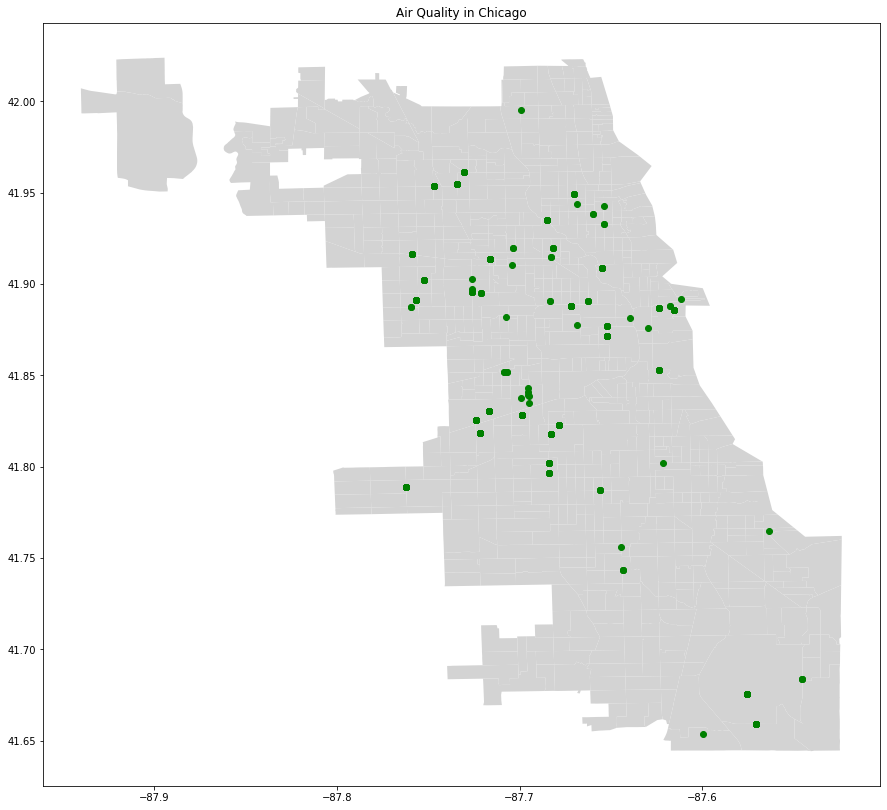

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
air_quality_geo.plot(ax = ax, color='g')
ax.set_title('Air Quality in Chicago')

## Building permit

In [ ]:
building_permit_api = 'https://data.cityofchicago.org/resource/building-permits.json'
building_permit = pd.read_json(building_permit_api)

In [ ]:
building_permit.head()

,id,permit_,permit_type,review_type,application_start_date,issue_date,processing_time,street_number,street_direction,street_name,suffix,work_description,building_fee_paid,zoning_fee_paid,other_fee_paid,subtotal_paid,building_fee_unpaid,zoning_fee_unpaid,other_fee_unpaid,subtotal_unpaid,building_fee_waived,zoning_fee_waived,other_fee_waived,subtotal_waived,total_fee,contact_1_type,contact_1_name,contact_1_city,contact_1_state,contact_1_zipcode,reported_cost,pin1,community_area,ward,census_tract,contact_2_type,contact_2_name,contact_2_city,contact_2_state,contact_2_zipcode,...,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_awaf_s7ux,contact_6_type,contact_6_name,contact_6_city,contact_6_state,contact_6_zipcode,contact_7_type,contact_7_name,contact_7_city,contact_7_state,contact_7_zipcode,contact_8_type,contact_8_name,contact_8_city,contact_8_state,contact_8_zipcode,contact_9_type,contact_9_name,contact_9_city,contact_9_state,contact_9_zipcode,contact_10_type,contact_10_name,contact_10_city,contact_10_state,contact_10_zipcode,contact_11_type,contact_11_name,contact_11_city,contact_11_state,contact_11_zipcode,contact_12_type,contact_12_name,contact_12_city,contact_12_state,contact_12_zipcode,pin8
0,1830273,100190752,PERMIT - SIGNS,SIGN PERMIT,2007-10-16T00:00:00.000,2008-03-05T00:00:00.000,1970-01-01 00:02:21,6349,S,COTTAGE GROVE,AVE,INSTALL BUILDING SIGN,70.0,75,0.0,145.0,0.0,0,0,0.0,0.0,0,0,0.0,145.0,SIGN CONTRACTOR,JAS. D. AHERN CO.,CHICAGO X,IL,60623,2000.0,20-23-100-005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2060019,100296510,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,2009-06-15T00:00:00.000,2009-06-15T00:00:00.000,1970-01-01 00:00:00,10000,N,BESSIE COLEMAN,DR,LOW VOLTAGE,50.0,0,0.0,50.0,0.0,0,0,0.0,0.0,0,0,0.0,50.0,CONTRACTOR-ELECTRICAL,ELITE ELECTRIC CO. INC.,MELROSE PARK,IL,60160,70000.0,NaN,76.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1671981,100108067,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,2006-04-17T00:00:00.000,2006-04-17T00:00:00.000,1970-01-01 00:00:00,7535,N,HERMITAGE,AVE,ADD CIRCUITS FOR COMPUTERS.,40.0,0,0.0,40.0,0.0,0,0,0.0,0.0,0,0,0.0,40.0,CONTRACTOR-ELECTRICAL,"PACE SYSTEMS, INC.",NAPERVILLE,IL,60563-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2832499,100696131,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,2017-03-20T00:00:00.000,2017-03-20T00:00:00.000,1970-01-01 00:00:00,150,N,RIVERSIDE,PLZ,LOW VOLTAGE CABLING FOR 18TH & 25TH FLOOR BUIL...,150.0,0,0.0,150.0,0.0,0,0,0.0,0.0,0,0,0.0,150.0,CONTRACTOR-ELECTRICAL,PAUL M CARUSO,LOMBARD,IL,60148-,39600.0,NaN,28.0,42.0,2801.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3053734,100830913,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,2019-07-17T00:00:00.000,2019-07-17T00:00:00.000,1970-01-01 00:00:00,4001,N,RAVENSWOOD,AVE,ATT IL01735G NR UPGRADE - 850: SWAP (3) EXIST ...,300.0,0,0.0,300.0,0.0,0,0,0.0,0.0,0,0,0.0,300.0,CONTRACTOR-ELECTRICAL,BRIAN K PETERSEN,ELGIN,IL,60124-,15000.0,14-18-420-031,6.0,47.0,60200.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
building_permit.describe()

,id,permit_,street_number,building_fee_paid,zoning_fee_paid,other_fee_paid,subtotal_paid,building_fee_unpaid,zoning_fee_unpaid,other_fee_unpaid,subtotal_unpaid,building_fee_waived,zoning_fee_waived,other_fee_waived,subtotal_waived,total_fee,reported_cost,community_area,ward,census_tract,xcoordinate,ycoordinate,latitude,longitude,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_awaf_s7ux,contact_11_zipcode,contact_12_zipcode
count,1.000000e+03,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1.000000e+03,621.000000,601.000000,581.000000,4.700000e+02,4.700000e+02,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,1.0,1.0
mean,2.216802e+06,9.998492e+07,4218.52900,931.219840,42.113000,48.946250,1022.279090,18.220100,0.0,0.300000,18.520100,287.738750,2.150000,1.32700,291.215750,1332.01494,2.652840e+05,30.718196,30.697171,144671.745267,1.164196e+06,1.903050e+06,41.914835,-87.664001,24.969231,40.430769,17811.707692,449.323077,31.392308,26.561538,60618.0,60647.0
std,4.875714e+05,6.340175e+06,4696.83956,9957.360175,81.433074,321.787586,9978.441167,565.435647,0.0,4.464295,565.443594,2628.669037,13.894984,39.66032,2637.171017,10379.49468,3.565715e+06,24.858947,14.431383,286939.027689,1.545605e+04,2.942977e+04,0.042644,0.029399,17.357588,18.636855,6383.584250,247.196567,11.640278,14.533577,NaN,NaN
min,8.815490e+05,5.369700e+04,8.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,40.00000,0.000000e+00,1.000000,1.000000,106.000000,1.120297e+06,1.817559e+06,41.693262,-87.764903,1.000000,2.000000,4301.000000,17.000000,3.000000,1.000000,60618.0,60647.0
25%,1.824712e+06,1.001877e+08,1734.50000,50.000000,0.000000,0.000000,50.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,50.00000,8.675000e+01,7.000000,20.000000,1504.000000,1.156429e+06,1.885644e+06,41.903348,-87.680798,16.000000,25.000000,14926.000000,213.250000,23.000000,16.000000,60618.0,60647.0
50%,2.055296e+06,1.002942e+08,2646.00000,75.000000,0.000000,0.000000,125.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,150.00000,2.475000e+03,28.000000,35.000000,3804.000000,1.166670e+06,1.915158e+06,41.918756,-87.664229,22.000000,37.500000,21190.000000,481.000000,34.000000,22.000000,60618.0,60647.0
75%,2.535355e+06,1.005263e+08,6349.00000,255.250000,75.000000,0.000000,325.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,375.00000,2.000000e+04,42.000000,42.000000,71000.000000,1.172307e+06,1.921111e+06,41.939956,-87.645531,39.000000,57.000000,21560.000000,665.750000,40.000000,38.000000,60618.0,60647.0
max,3.203489e+06,1.009347e+08,111601.00000,300888.420000,1500.000000,4603.000000,300963.420000,17880.100000,0.0,75.000000,17880.100000,41485.500000,225.000000,1252.00000,41560.500000,300963.42000,8.325000e+07,77.000000,50.000000,980000.000000,1.199555e+06,1.950305e+06,41.994910,-87.595285,56.000000,68.000000,22620.000000,797.000000,50.000000,51.000000,60618.0,60647.0


In [ ]:
building_permit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 108 entries, id to pin8
dtypes: datetime64[ns](1), float64(24), int64(8), object(75)
memory usage: 843.9+ KB


In [ ]:
location_null = building_permit['street_number'].isnull().sum()
print(location_null)
location_null_array.append(location_null)

0


In [ ]:
building_permit.isnull().sum()

id                          0
permit_                     0
permit_type                 0
review_type                 0
application_start_date      3
                         ... 
contact_12_name           999
contact_12_city           999
contact_12_state          999
contact_12_zipcode        999
pin8                      999
Length: 108, dtype: int64

In [ ]:
building_permit_geo = gpd.GeoDataFrame(building_permit, geometry = gpd.points_from_xy(building_permit.longitude, building_permit.latitude))

Text(0.5, 1.0, 'Building permits in Chicago')

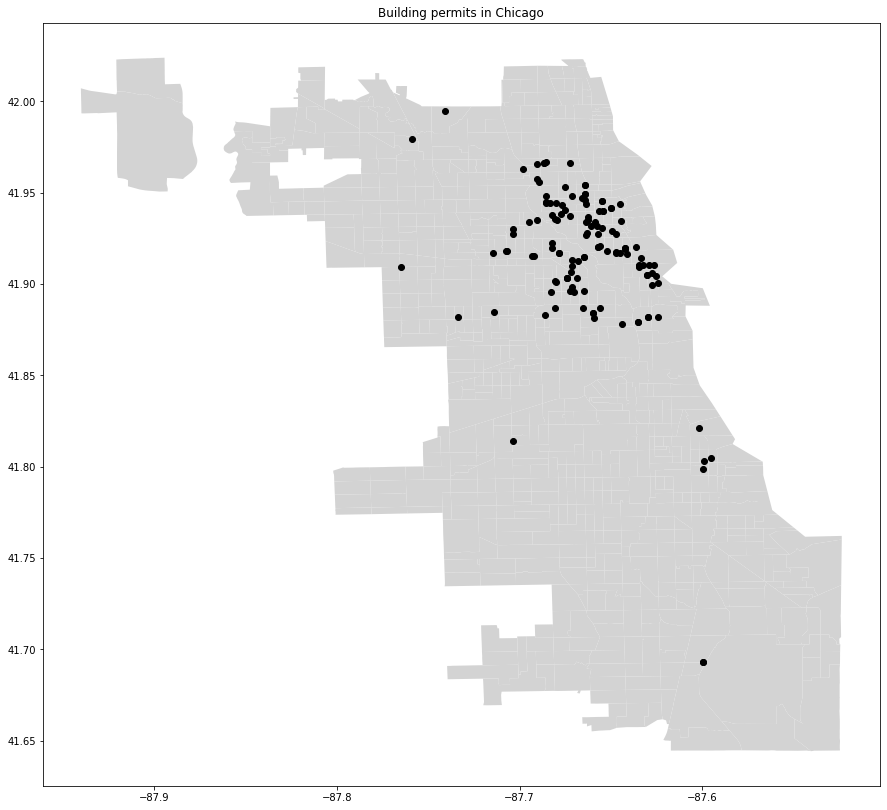

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
building_permit_geo.plot(ax = ax, color='black')
ax.set_title('Building permits in Chicago')

## Beach Weather

In [ ]:
beach_api = 'https://data.cityofchicago.org/resource/g3ip-u8rb.json'
beach_weather = pd.read_json(beach_api)

In [ ]:
beach_weather.head()

,sensor_name,sensor_type,latitude,longitude,location,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_awaf_s7ux,:@computed_region_vrxf_vc4k,:@computed_region_43wa_7qmu
0,63rd Street Beach,Water,41.784561,-87.571453,"{'latitude': '41.784561', 'longitude': '-87.57...",22260,469,NaN,NaN,NaN
1,Calumet Beach,Water,41.714739,-87.527356,"{'latitude': '41.714739', 'longitude': '-87.52...",21202,705,NaN,NaN,NaN
2,Montrose Beach,Water,41.969094,-87.638003,"{'latitude': '41.969094', 'longitude': '-87.63...",21186,636,NaN,NaN,NaN
3,Ohio Street Beach,Water,41.894328,-87.613083,"{'latitude': '41.894328', 'longitude': '-87.61...",21182,159,NaN,NaN,NaN
4,Osterman Beach,Water,41.987675,-87.651008,"{'latitude': '41.987675', 'longitude': '-87.65...",4451,14,NaN,NaN,NaN


In [ ]:
beach_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sensor_name                  9 non-null      object 
 1   sensor_type                  9 non-null      object 
 2   latitude                     9 non-null      float64
 3   longitude                    9 non-null      float64
 4   location                     9 non-null      object 
 5   :@computed_region_6mkv_f3dw  9 non-null      int64  
 6   :@computed_region_bdys_3d7i  9 non-null      int64  
 7   :@computed_region_awaf_s7ux  3 non-null      float64
 8   :@computed_region_vrxf_vc4k  3 non-null      float64
 9   :@computed_region_43wa_7qmu  3 non-null      float64
dtypes: float64(5), int64(2), object(3)
memory usage: 848.0+ bytes


In [ ]:
beach_weather.describe()

,latitude,longitude,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_awaf_s7ux,:@computed_region_vrxf_vc4k,:@computed_region_43wa_7qmu
count,9.000000,9.000000,9.000000,9.000000,3.000000,3.000000,3.000000
mean,41.863333,-87.599327,19875.222222,401.444444,31.333333,25.666667,20.000000
std,0.104650,0.045175,5817.828456,251.990134,9.018500,14.742230,11.532563
min,41.714739,-87.651008,4451.000000,14.000000,22.000000,9.000000,11.000000
25%,41.780992,-87.638003,21182.000000,159.000000,27.000000,20.000000,13.500000
50%,41.894328,-87.613083,21202.000000,469.000000,32.000000,31.000000,16.000000
75%,41.969094,-87.571453,22260.000000,635.000000,36.000000,34.000000,24.500000
max,41.987675,-87.527356,22616.000000,705.000000,40.000000,37.000000,33.000000


In [ ]:
location_null = beach_weather['latitude'].isnull().sum()
print(location_null)
location_null_array.append(location_null)

0


In [ ]:
beach_weather_geo = gpd.GeoDataFrame(beach_weather, geometry = gpd.points_from_xy(beach_weather.longitude, beach_weather.latitude))

Text(0.5, 1.0, 'Beach weather sensor in Chicago')

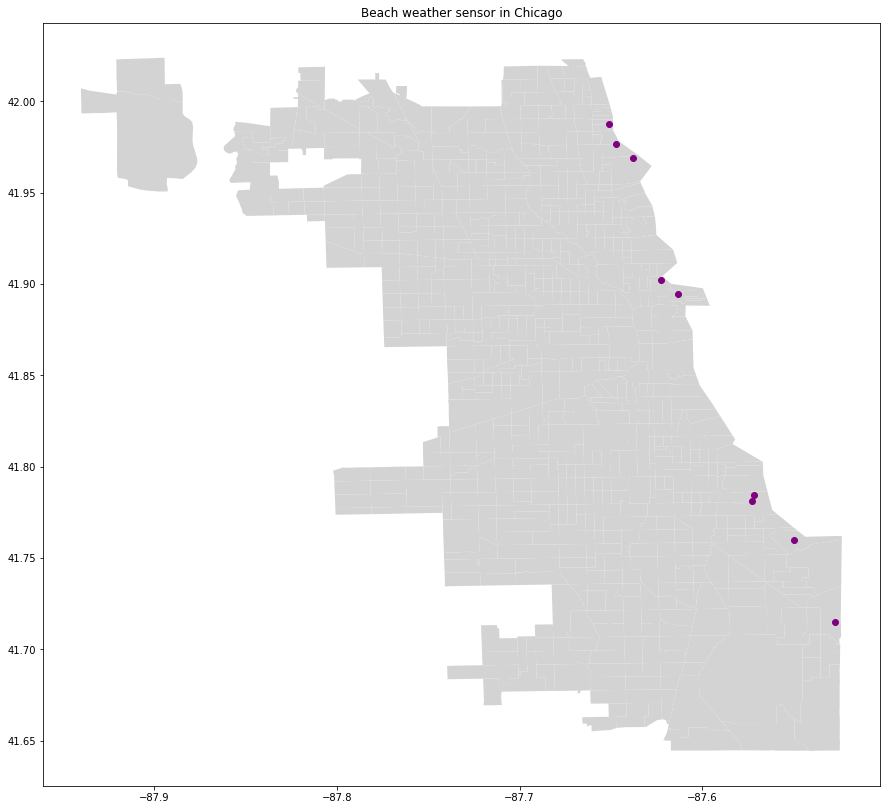

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
beach_weather_geo.plot(ax = ax, color = 'purple')
ax.set_title('Beach weather sensor in Chicago')

## Graffiti

In [ ]:
graffiti_api = 'https://data.cityofchicago.org/resource/8tus-apua.json'
graffiti = pd.read_json(graffiti_api)

In [ ]:
graffiti.head()

,:@computed_region_43wa_7qmu,zip_code,location,y_coordinate,where_is_the_graffiti_located_,completion_date,latitude,:@computed_region_awaf_s7ux,community_area,what_type_of_surface_is_the_graffiti_on_,x_coordinate,ward,street_address,police_district,longitude,:@computed_region_bdys_3d7i,status,:@computed_region_6mkv_f3dw,creation_date,service_request_number,type_of_service_request,:@computed_region_vrxf_vc4k,ssa
0,1.0,60623.0,"{'latitude': '41.851711087368', 'needs_recodin...",1.889229e+06,Side,2018-12-19T00:00:00.000,41.851711,29.0,30.0,Brick - Painted,1.156487e+06,12.0,3021 W CERMAK RD,10.0,-87.701334,261.0,Completed,21569.0,2018-12-18T00:00:00.000,18-03388814,Graffiti Removal,32.0,NaN
1,17.0,60639.0,"{'latitude': '41.924902434957', 'needs_recodin...",1.915718e+06,Rear,2018-12-19T00:00:00.000,41.924902,7.0,20.0,Brick - Painted,1.147648e+06,31.0,2415 N TRIPP AVE,25.0,-87.732760,439.0,Completed,22615.0,2018-12-18T00:00:00.000,18-03387669,Graffiti Removal,21.0,NaN
2,1.0,60623.0,"{'latitude': '41.851708590512', 'needs_recodin...",1.889228e+06,Side,2018-12-19T00:00:00.000,41.851709,29.0,30.0,Brick - Painted,1.156447e+06,12.0,3025 W CERMAK RD,10.0,-87.701519,261.0,Completed,21569.0,2018-12-18T00:00:00.000,18-03388833,Graffiti Removal,32.0,NaN
3,23.0,60644.0,"{'latitude': '41.884591582851', 'needs_recodin...",1.901048e+06,Garage,2018-12-19T00:00:00.000,41.884592,11.0,25.0,Vinyl Siding,1.145010e+06,28.0,4700 W MAYPOLE AVE,11.0,-87.743089,696.0,Completed,22216.0,2018-12-18T00:00:00.000,18-03387473,Graffiti Removal,26.0,NaN
4,46.0,60642.0,"{'latitude': '41.894229784229', 'needs_recodin...",1.904811e+06,Side,2018-12-19T00:00:00.000,41.894230,41.0,24.0,Brick - Unpainted,1.169638e+06,27.0,694 N MILWAUKEE AVE,12.0,-87.652521,522.0,Completed,22620.0,2018-12-18T00:00:00.000,18-03388870,Graffiti Removal,25.0,29.0


In [ ]:
graffiti.describe()

,:@computed_region_43wa_7qmu,zip_code,y_coordinate,latitude,:@computed_region_awaf_s7ux,community_area,x_coordinate,ward,police_district,longitude,:@computed_region_bdys_3d7i,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,ssa
count,998.000000,999.000000,9.970000e+02,999.000000,998.000000,997.000000,9.970000e+02,997.000000,997.000000,999.000000,998.000000,999.000000,998.000000,280.000000
mean,22.568136,60565.270270,1.905220e+06,41.895677,23.582164,28.831494,1.159867e+06,28.547643,14.229689,-87.688486,370.976954,19165.309309,37.571142,31.821429
std,14.513400,1918.184878,2.463690e+04,0.067753,14.452730,21.824089,9.883636e+03,14.306140,5.903372,0.036370,250.837179,5037.476769,18.905467,13.154046
min,1.000000,0.000000,1.827212e+06,41.680767,2.000000,0.000000,1.125332e+06,0.000000,0.000000,-87.814275,2.000000,4299.000000,1.000000,1.000000
25%,11.000000,60614.000000,1.885574e+06,41.841715,13.000000,8.000000,1.153976e+06,14.000000,9.000000,-87.710333,138.000000,14924.000000,22.000000,24.000000
50%,20.000000,60623.000000,1.912082e+06,41.914461,22.000000,22.000000,1.160040e+06,30.000000,14.000000,-87.687475,324.000000,21538.000000,33.000000,33.000000
75%,36.000000,60639.000000,1.925177e+06,41.950356,35.000000,52.000000,1.166142e+06,42.000000,19.000000,-87.665396,613.000000,22248.000000,56.000000,38.000000
max,50.000000,60707.000000,1.950362e+06,42.019398,53.000000,77.000000,1.201478e+06,50.000000,25.000000,-87.537544,801.000000,22620.000000,77.000000,60.000000


In [ ]:
graffiti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   :@computed_region_43wa_7qmu               998 non-null    float64
 1   zip_code                                  999 non-null    float64
 2   location                                  999 non-null    object 
 3   y_coordinate                              997 non-null    float64
 4   where_is_the_graffiti_located_            998 non-null    object 
 5   completion_date                           854 non-null    object 
 6   latitude                                  999 non-null    float64
 7   :@computed_region_awaf_s7ux               998 non-null    float64
 8   community_area                            997 non-null    float64
 9   what_type_of_surface_is_the_graffiti_on_  998 non-null    object 
 10  x_coordinate                         

In [ ]:
graffiti.isnull().sum()

:@computed_region_43wa_7qmu                   2
zip_code                                      1
location                                      1
y_coordinate                                  3
where_is_the_graffiti_located_                2
completion_date                             146
latitude                                      1
:@computed_region_awaf_s7ux                   2
community_area                                3
what_type_of_surface_is_the_graffiti_on_      2
x_coordinate                                  3
ward                                          3
street_address                                0
police_district                               3
longitude                                     1
:@computed_region_bdys_3d7i                   2
status                                        0
:@computed_region_6mkv_f3dw                   1
creation_date                                 0
service_request_number                        0
type_of_service_request                 

In [ ]:
graffiti_geo = gpd.GeoDataFrame(graffiti, geometry = gpd.points_from_xy(graffiti.longitude, graffiti.latitude))

In [ ]:
location_null = graffiti['latitude'].isnull().sum()
print(location_null)
location_null_array.append(location_null)

1


Text(0.5, 1.0, 'Graffiti in Chicago')

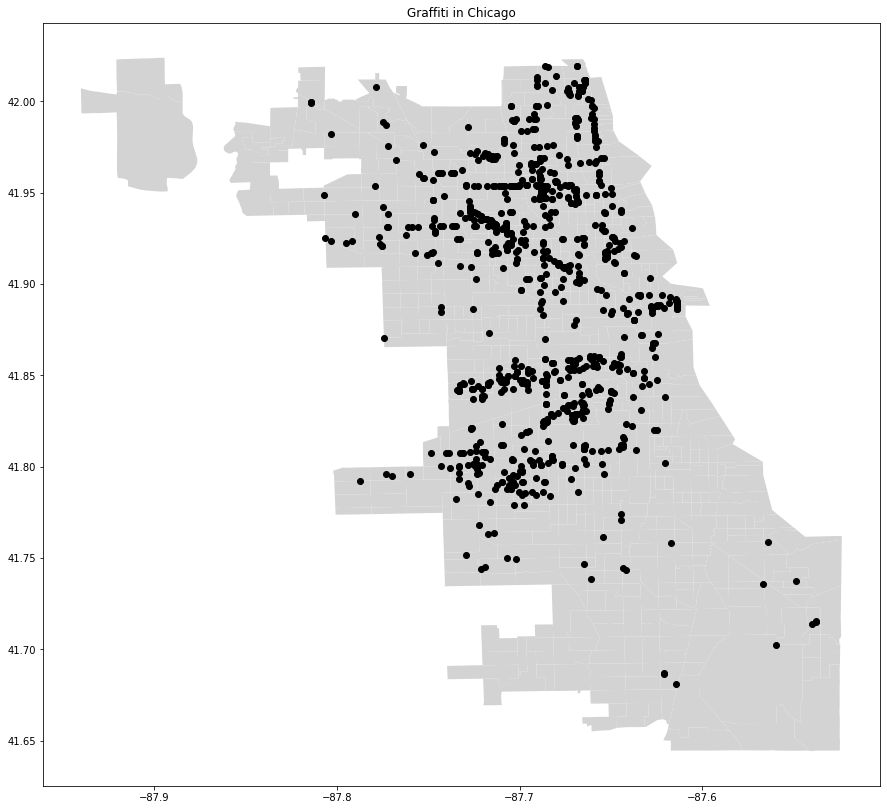

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
graffiti_geo.plot(ax = ax, color = 'black')
ax.set_title('Graffiti in Chicago')

## Flu shots

In [ ]:
flu_api = 'https://data.cityofchicago.org/resource/w3hg-pyhz.json'
flu_shot = pd.read_json(flu_api)

In [ ]:
flu_shot.describe()

,facility_id,latitude,longitude,postal_code,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
count,1000.000000,1000.000000,1000.000000,1000.000000,998.000000,998.000000,1000.000000,998.000000,998.000000
mean,147.630000,41.869586,-87.675036,60628.496000,30.294589,39.459920,18261.490000,377.136273,27.101202
std,91.043198,0.087438,0.056534,17.956515,18.425632,19.551744,6148.998612,239.447386,13.645636
min,1.000000,41.676700,-87.836830,60601.000000,1.000000,1.000000,4299.000000,1.000000,1.000000
25%,67.000000,41.795915,-87.712400,60614.000000,15.000000,25.000000,14920.000000,158.000000,16.000000
50%,143.000000,41.885785,-87.665800,60625.500000,28.000000,37.000000,21538.000000,366.000000,28.000000
75%,226.250000,41.939725,-87.636900,60641.000000,46.000000,57.000000,22216.000000,584.250000,38.000000
max,320.000000,42.019290,-87.535300,60707.000000,61.000000,77.000000,22620.000000,794.000000,50.000000


In [ ]:
flu_shot.isnull().sum()

season                           0
facility_id                      0
latitude                         0
longitude                        0
street1                          0
city                             0
state                            0
postal_code                      0
country                          0
facility_name                    0
begin_date                       0
end_date                         0
begin_time                     727
end_time                       727
begin_datetime                 727
end_datetime                   727
recurrence_days                258
cost                           258
notes                          680
record_id                        0
location                         0
:@computed_region_rpca_8um6      2
:@computed_region_vrxf_vc4k      2
:@computed_region_6mkv_f3dw      0
:@computed_region_bdys_3d7i      2
:@computed_region_43wa_7qmu      2
url                            529
phone                          272
hours               

In [ ]:
flu_shot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   season                       1000 non-null   object        
 1   facility_id                  1000 non-null   int64         
 2   latitude                     1000 non-null   float64       
 3   longitude                    1000 non-null   float64       
 4   street1                      1000 non-null   object        
 5   city                         1000 non-null   object        
 6   state                        1000 non-null   object        
 7   postal_code                  1000 non-null   int64         
 8   country                      1000 non-null   object        
 9   facility_name                1000 non-null   object        
 10  begin_date                   1000 non-null   object        
 11  end_date                     1000 non-null  

In [ ]:
location_null = flu_shot['latitude'].isnull().sum()
print(location_null)
location_null_array.append(location_null)

0


In [ ]:
flu_shot_geo = gpd.GeoDataFrame(flu_shot, geometry = gpd.points_from_xy(flu_shot.longitude, flu_shot.latitude))

Text(0.5, 1.0, 'Flu shots in Chicago')

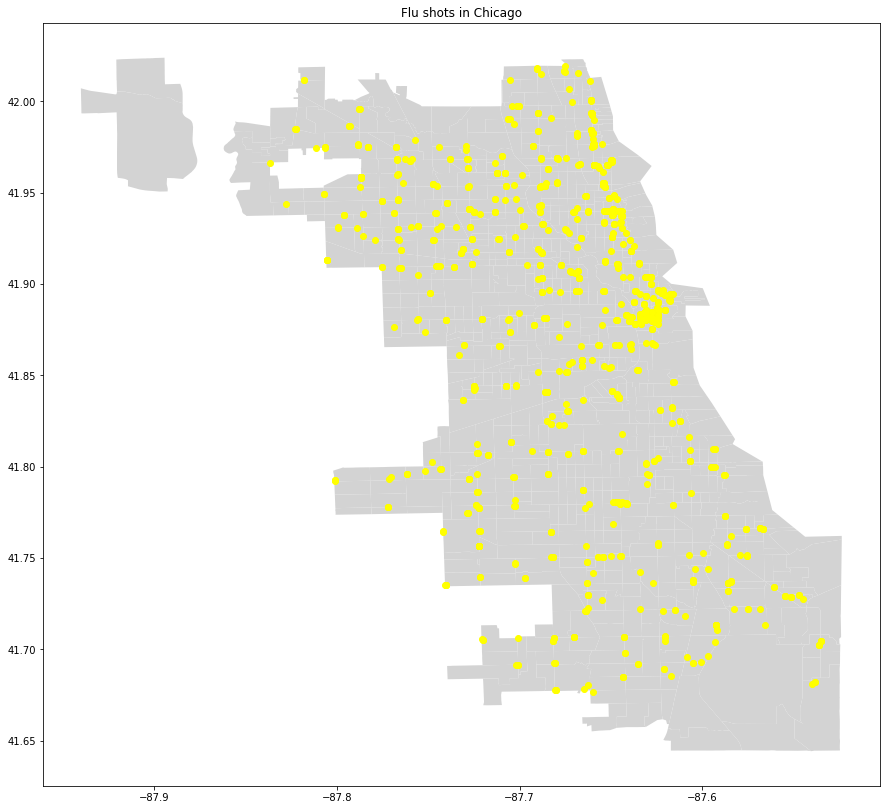

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
flu_shot_geo.plot(ax = ax, color = 'yellow')
ax.set_title('Flu shots in Chicago')

## Environmental Inspections

In [ ]:
env_insp_api = 'https://data.cityofchicago.org/resource/i9rk-duva.json'
env_insp = pd.read_json(env_insp_api)

In [ ]:
env_insp.describe()

,inspection_number,street_number,latitude,longitude,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,street_number_to
count,1.000000e+03,1000.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,114.000000
mean,1.083333e+06,3845.419000,41.855717,-87.685341,35.321157,34.021309,20322.828006,427.013699,35.490107,12015.456140
std,7.717555e+05,3588.417049,0.064169,0.044529,16.048100,11.318807,3797.137925,205.444977,14.544936,1403.346753
min,4.172630e+05,10.000000,41.653674,-87.771705,1.000000,7.000000,4299.000000,10.000000,1.000000,450.000000
25%,5.331192e+05,1800.000000,41.825320,-87.721462,28.000000,29.000000,21184.000000,200.000000,28.000000,12201.000000
50%,1.064480e+06,2040.000000,41.887862,-87.672053,28.000000,29.000000,21194.000000,579.000000,45.000000,12201.000000
75%,1.532362e+06,3741.000000,41.887862,-87.672053,56.000000,34.000000,22216.000000,579.000000,46.000000,12201.000000
max,1.474907e+07,12201.000000,41.970360,-87.545219,59.000000,70.000000,22620.000000,786.000000,50.000000,12201.000000


In [ ]:
env_insp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   inspection_number            1000 non-null   int64  
 1   modified_date                1000 non-null   object 
 2   site_name                    971 non-null    object 
 3   map_address                  1000 non-null   object 
 4   street_number                1000 non-null   int64  
 5   direction                    1000 non-null   object 
 6   street_name                  1000 non-null   object 
 7   street_type                  998 non-null    object 
 8   inspection_type              1000 non-null   object 
 9   inspection_sub_category      1000 non-null   object 
 10  inspector                    989 non-null    object 
 11  inspection_date              989 non-null    object 
 12  narrative                    1000 non-null   object 
 13  data_source        

In [ ]:
env_insp.isnull().sum()

inspection_number                0
modified_date                    0
site_name                       29
map_address                      0
street_number                    0
direction                        0
street_name                      0
street_type                      2
inspection_type                  0
inspection_sub_category          0
inspector                       11
inspection_date                 11
narrative                        0
data_source                      0
latitude                       343
longitude                      343
location                       343
:@computed_region_rpca_8um6    343
:@computed_region_vrxf_vc4k    343
:@computed_region_6mkv_f3dw    343
:@computed_region_bdys_3d7i    343
:@computed_region_43wa_7qmu    343
street_number_to               886
dtype: int64

In [ ]:
env_insp_geo = gpd.GeoDataFrame(env_insp, geometry = gpd.points_from_xy(env_insp.longitude, env_insp.latitude))

In [ ]:
location_null = env_insp['latitude'].isnull().sum()
print(location_null)
location_null_array.append(location_null)

343


Text(0.5, 1.0, 'Environmental Inspections in Chicago')

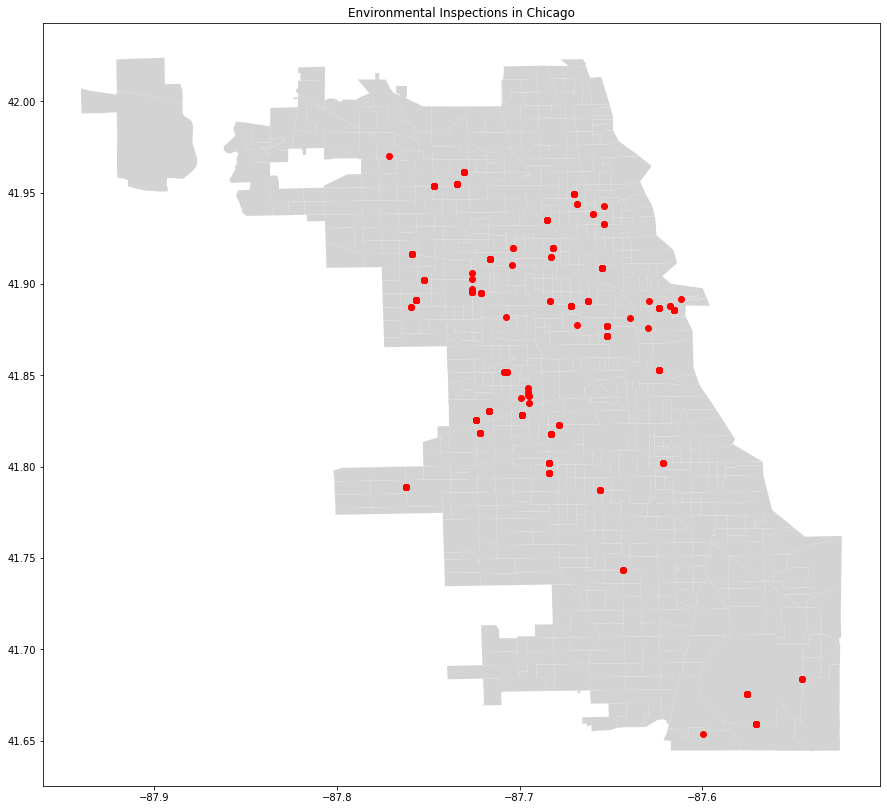

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
env_insp_geo.plot(ax = ax, color = 'red')
ax.set_title('Environmental Inspections in Chicago')

## Environmental Complanints

In [ ]:
env_complaints_api = 'https://data.cityofchicago.org/resource/fypr-ksnz.json'
env_complaints = pd.read_json(env_complaints_api)

In [ ]:
env_complaints.head()

,complaint_id,complaint_type,address,street_number,direction,street_name,street_type,inspector,complaint_date,complaint_detail,inspection_log,data_source,modified_date,street_number_to,latitude,longitude,location,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
0,DOECOMP2,Noise Complaint,"1 S STATE ST, CHICAGO, IL",1,S,STATE,ST,10.0,1993-08-23T00:00:00.000,STREET MUSIC HEAVY NOISE POLLUTION REFERRED TO...,MORE INFORMATION MAY BE AVAILABLE IN THE CDPH ...,HISTORIC DEPT. OF ENVIRONMENT,2012-01-01T00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DOECOMP73,Noise Complaint,"10 S WACKER DR, CHICAGO, IL",10,S,WACKER,DR,25.0,1993-04-02T00:00:00.000,SAXOPHONE PLAYING ON MADISON.,MORE INFORMATION MAY BE AVAILABLE IN THE CDPH ...,HISTORIC DEPT. OF ENVIRONMENT,2012-01-01T00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DOECOMP90,Asbestos Work Order,"100 E OHIO ST, CHICAGO, IL",100,E,OHIO,ST,13.0,1994-11-08T00:00:00.000,GREEN TRAVEL FINE DUST ...,MORE INFORMATION MAY BE AVAILABLE IN THE CDPH ...,HISTORIC DEPT. OF ENVIRONMENT,2012-01-01T00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DOECOMP80,Toxics Hazardous Materials Work Order,"10 S WACKER DR, CHICAGO, IL",10,S,WACKER,DR,17.0,1993-01-27T00:00:00.000,TOXIC ODORS ON 37TH FLOOR AT ABOVE ADDRESS.,MORE INFORMATION MAY BE AVAILABLE IN THE CDPH ...,HISTORIC DEPT. OF ENVIRONMENT,2012-01-01T00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DOECOMP236,Illegal Dumping Work Order,"10000 S STONY ISLAND AVE, CHICAGO, IL",10000,S,STONY ISLAND,AVE,10.0,1995-10-26T00:00:00.000,RESIDENTIAL AREA FLY DUMPIN...,MORE INFORMATION MAY BE AVAILABLE IN THE CDPH ...,HISTORIC DEPT. OF ENVIRONMENT,2012-01-01T00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
env_complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   complaint_id                 1000 non-null   object 
 1   complaint_type               1000 non-null   object 
 2   address                      1000 non-null   object 
 3   street_number                1000 non-null   int64  
 4   direction                    1000 non-null   object 
 5   street_name                  1000 non-null   object 
 6   street_type                  988 non-null    object 
 7   inspector                    967 non-null    float64
 8   complaint_date               999 non-null    object 
 9   complaint_detail             948 non-null    object 
 10  inspection_log               1000 non-null   object 
 11  data_source                  1000 non-null   object 
 12  modified_date                1000 non-null   object 
 13  street_number_to   

In [ ]:
env_complaints.describe()

,street_number,inspector,street_number_to,latitude,longitude,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
count,1000.000000,967.000000,32.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,3689.788000,7904.644261,3670.218750,41.853091,-87.664074,30.281938,38.533040,19490.682819,416.079295,29.277533
std,2706.579273,34930.125659,3003.230484,0.091439,0.066627,18.916673,18.304758,5348.029124,211.573128,14.125154
min,1.000000,3.000000,77.000000,41.674553,-87.832668,1.000000,4.000000,4299.000000,1.000000,1.000000
25%,1543.750000,16.000000,1107.000000,41.768174,-87.711900,16.000000,24.500000,21190.000000,255.000000,18.000000
50%,3254.000000,35.000000,3288.500000,41.878711,-87.660690,25.000000,37.000000,21554.000000,451.000000,32.000000
75%,5117.250000,101.500000,4752.250000,41.924616,-87.626096,49.000000,53.000000,22251.000000,578.000000,41.000000
max,13800.000000,379542.000000,11834.000000,42.021028,-87.531965,61.000000,77.000000,22620.000000,789.000000,50.000000


In [ ]:
env_complaints.isnull().sum()

complaint_id                     0
complaint_type                   0
address                          0
street_number                    0
direction                        0
street_name                      0
street_type                     12
inspector                       33
complaint_date                   1
complaint_detail                52
inspection_log                   0
data_source                      0
modified_date                    0
street_number_to               968
latitude                       773
longitude                      773
location                       773
:@computed_region_rpca_8um6    773
:@computed_region_vrxf_vc4k    773
:@computed_region_6mkv_f3dw    773
:@computed_region_bdys_3d7i    773
:@computed_region_43wa_7qmu    773
dtype: int64

In [ ]:
location_null = env_complaints['street_number'].isnull().sum()
print(location_null)
location_null_array.append(location_null)

0


In [ ]:
env_complaints_geo = gpd.GeoDataFrame(env_complaints, geometry = gpd.points_from_xy(env_complaints.longitude, env_complaints.latitude))

Text(0.5, 1.0, 'Environmental Complaints in Chicago')

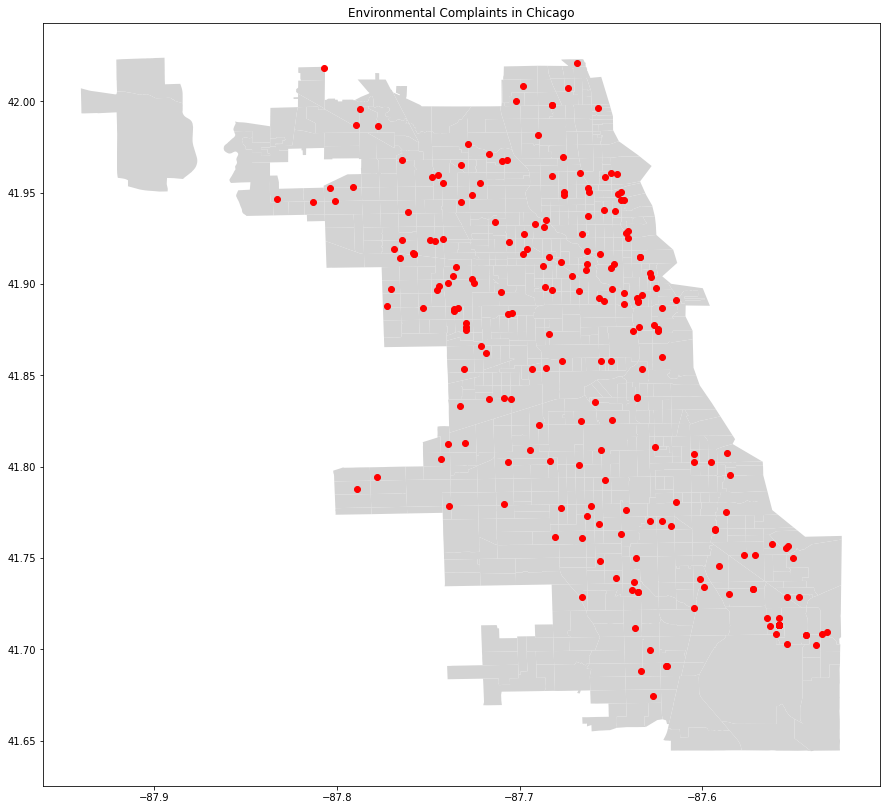

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
env_complaints_geo.plot(ax = ax, color = 'red')
ax.set_title('Environmental Complaints in Chicago')

## Grocery stores

In [ ]:
grocery_store_api = 'https://data.cityofchicago.org/resource/3e26-zek2.json'
grocery_store = pd.read_json(grocery_store_api)

In [ ]:
grocery_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   store_name                   264 non-null    object 
 1   address                      264 non-null    object 
 2   zip                          263 non-null    object 
 3   new_status                   264 non-null    object 
 4   last_updated                 255 non-null    object 
 5   location                     262 non-null    object 
 6   :@computed_region_rpca_8um6  256 non-null    float64
 7   :@computed_region_vrxf_vc4k  256 non-null    float64
 8   :@computed_region_6mkv_f3dw  262 non-null    float64
 9   :@computed_region_bdys_3d7i  257 non-null    float64
 10  :@computed_region_43wa_7qmu  256 non-null    float64
dtypes: float64(5), object(6)
memory usage: 22.8+ KB


In [ ]:
grocery_store.describe()

,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
count,256.000000,256.000000,262.000000,257.000000,256.000000
mean,30.429688,37.609375,18849.175573,367.000000,25.351562
std,19.904353,19.985773,5845.477883,240.573647,14.515760
min,1.000000,1.000000,4299.000000,1.000000,1.000000
25%,13.000000,22.750000,14926.000000,138.000000,12.750000
50%,29.000000,33.000000,21554.000000,340.000000,25.000000
75%,50.000000,56.250000,22254.000000,580.000000,38.250000
max,61.000000,77.000000,22620.000000,801.000000,50.000000


In [ ]:
grocery_store.isnull().sum()

store_name                     0
address                        0
zip                            1
new_status                     0
last_updated                   9
location                       2
:@computed_region_rpca_8um6    8
:@computed_region_vrxf_vc4k    8
:@computed_region_6mkv_f3dw    2
:@computed_region_bdys_3d7i    7
:@computed_region_43wa_7qmu    8
dtype: int64

In [ ]:
grocery_store['location'][0]['coordinates'][0]

-87.626243

In [ ]:
location_null = grocery_store['location'].isnull().sum()
print(location_null)
location_null_array.append(location_null)

2


In [ ]:
n_gs = grocery_store.shape[0]

lat_col = []
lon_col = []

for i in range(n_gs):
  location = grocery_store.location[i]
  try:
    #print(location['latitude'])
    lat_col.append(location['coordinates'][1])
    lon_col.append(location['coordinates'][0])
  except:
    lat_col.append(np.nan)
    lon_col.append(np.nan)

In [ ]:
grocery_store['latitude'] = lat_col
grocery_store['longitude'] = lon_col

In [ ]:
grocery_store_geo = gpd.GeoDataFrame(grocery_store, geometry = gpd.points_from_xy(grocery_store.longitude, grocery_store.latitude))

In [ ]:
grocery_store_geo.tail()

,store_name,address,zip,new_status,last_updated,location,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,latitude,longitude,geometry
259,Fat Lee Supermarket,2707 S WELLS ST,60616,OPEN,2020-06-10T00:00:00.000,"{'type': 'Point', 'coordinates': [-87.633033, ...",40.0,35.0,21194.0,346.0,48.0,41.843813,-87.633033,POINT (-87.63303 41.84381)
260,Aldi,6220 N California Ave,60659-2608,OPEN,2020-06-04T15:00:00.000,"{'type': 'Point', 'coordinates': [-87.699541, ...",50.0,20.0,4450.0,30.0,27.0,41.994349,-87.699541,POINT (-87.69954 41.99435)
261,Fair Share Finer Foods,6422 W 63rd Street,60638,OPEN,2020-06-04T15:00:00.000,"{'type': 'Point', 'coordinates': [-87.782075, ...",7.0,62.0,22268.0,335.0,15.0,41.777702,-87.782075,POINT (-87.78208 41.77770)
262,Avenue Food Mart,6850 W BELMONT AVE,60634,OPEN,2020-06-10T00:00:00.000,"{'type': 'Point', 'coordinates': [-87.79769200...",52.0,17.0,22254.0,396.0,44.0,41.938134,-87.797692,POINT (-87.79769 41.93813)
263,Lindo Michoacan,3142 W LAWRENCE AVE,60625,OPEN,2020-06-10T00:00:00.000,"{'type': 'Point', 'coordinates': [-87.707908, ...",20.0,14.0,21849.0,749.0,20.0,41.968473,-87.707908,POINT (-87.70791 41.96847)


Text(0.5, 1.0, 'Grocery Stores in Chicago')

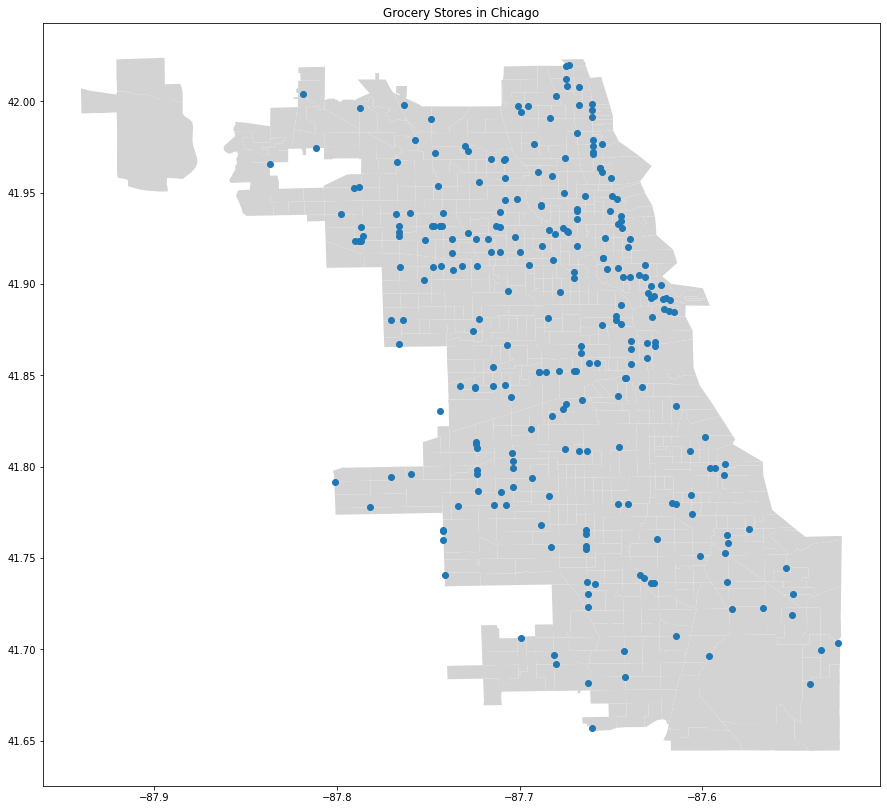

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
grocery_store_geo.plot(ax = ax)
ax.set_title('Grocery Stores in Chicago')

## Preschool programs

In [ ]:
preschool_api = 'https://data.cityofchicago.org/resource/ck29-hb9r.json'
preschool = pd.read_json(preschool_api)

In [ ]:
preschool.head()

,key,site_name,description,address,city,state,zip,phone_number,url,ages_served,ages_0_3,ages_3_5,weekday_availability,program_information,other_features,accreditation,quality,quality_rating,latitude,longitude,location,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
0,198,ABC Preschool,<p>We have seen that there is a need for stron...,3800 N Austin Ave,Chicago,IL,60634,(773) 685-9033,http://www.abcpreschoolchicago.com,2 years to 6 years,1.0,1.0,"Full Week, Part Week, Full Day, Half Day","Community Based, Head Start",Accepts CCAP,None,licensed,Licensed,41.949425,-87.776653,"{'latitude': '41.949425', 'longitude': '-87.77...",25.0,22254,17.0,443.0,19.0
1,200,Academy of St Benedict the African - Stewart,<p>Our preschool program serves children from ...,6547 S Stewart Ave,Chicago,IL,60621,(773) 994-6100,http://www.academystbenedictstewart.org,3 - 5,0.0,1.0,"Full Week, Full Day",Community Based,Accepts CCAP,"NAEYC, AdvanceEd candidate",licensed,Licensed,41.774735,-87.634413,"{'latitude': '41.774735', 'longitude': '-87.63...",53.0,21559,66.0,435.0,4.0
2,480,A Child's World,<p>Little Genius is located in the Roseland co...,2145 E 83rd St,Chicago,IL,60617,(773) 978-6598,http://adasmckinley.org,None,0.0,0.0,None,"Community Based, Head Start",Accepts CCAP,None,licensed,Licensed,41.744159,-87.571599,"{'latitude': '41.744159', 'longitude': '-87.57...",9.0,21202,42.0,507.0,37.0
3,999,Ada S. McKinley - Bunnyland Day Care,NaN,545 W 119th St,Chicago,IL,60628,(773) 568-5200,NaN,6 weeks to 5 years,1.0,1.0,None,Community Based,NaN,NAEYC,licensed,Licensed,41.677689,-87.636695,"{'latitude': '41.677688577398', 'longitude': '...",45.0,21861,50.0,60.0,22.0
4,205,Ada S. McKinley Community Services - Ersula Ho...,<p>Ersula Howard is located in the South shore...,7222 S Exchange Ave,Chicago,IL,60649,(773) 221-9711,http://www.adasmckinley.org,3 years to 5 years,0.0,1.0,"Full Week, Full Day","Offers Home Visiting, Community Based, Head Start",Accepts CCAP,COA,gold,Gold,41.763831,-87.564609,"{'latitude': '41.763831', 'longitude': '-87.56...",43.0,22538,39.0,417.0,37.0


In [ ]:
preschool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   key                          706 non-null    int64  
 1   site_name                    706 non-null    object 
 2   description                  609 non-null    object 
 3   address                      706 non-null    object 
 4   city                         706 non-null    object 
 5   state                        706 non-null    object 
 6   zip                          706 non-null    object 
 7   phone_number                 696 non-null    object 
 8   url                          634 non-null    object 
 9   ages_served                  706 non-null    object 
 10  ages_0_3                     679 non-null    float64
 11  ages_3_5                     705 non-null    float64
 12  weekday_availability         706 non-null    object 
 13  program_information 

In [ ]:
preschool.describe()

,key,ages_0_3,ages_3_5,latitude,longitude,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
count,706.000000,679.000000,705.000000,706.000000,706.000000,705.000000,706.000000,705.000000,705.000000,705.000000
mean,630.712465,0.363770,0.944681,41.833046,-87.675371,26.685106,19240.706799,40.151773,382.507801,25.070922
std,233.760782,0.481438,0.228764,0.087865,0.057183,15.795483,5721.978310,20.497809,227.589325,15.071348
min,197.000000,0.000000,0.000000,41.652097,-87.834184,1.000000,4299.000000,1.000000,1.000000,1.000000
25%,435.750000,0.000000,1.000000,41.764310,-87.714008,12.000000,21190.000000,25.000000,186.000000,12.000000
50%,643.500000,0.000000,1.000000,41.830195,-87.674116,26.000000,21569.000000,36.000000,382.000000,26.000000
75%,826.750000,1.000000,1.000000,41.902806,-87.637063,41.000000,22248.000000,60.000000,575.000000,38.000000
max,1023.000000,1.000000,1.000000,42.021062,-87.528156,53.000000,26615.000000,77.000000,801.000000,50.000000


In [ ]:
location_null = preschool['latitude'].isnull().sum()
print(location_null)
location_null_array.append(location_null)

0


In [ ]:
preschool.isnull().sum()

key                              0
site_name                        0
description                     97
address                          0
city                             0
state                            0
zip                              0
phone_number                    10
url                             72
ages_served                      0
ages_0_3                        27
ages_3_5                         1
weekday_availability             0
program_information              0
other_features                 465
accreditation                    0
quality                          0
quality_rating                   0
latitude                         0
longitude                        0
location                         0
:@computed_region_awaf_s7ux      1
:@computed_region_6mkv_f3dw      0
:@computed_region_vrxf_vc4k      1
:@computed_region_bdys_3d7i      1
:@computed_region_43wa_7qmu      1
dtype: int64

In [ ]:
preschool_geo = gpd.GeoDataFrame(preschool, geometry = gpd.points_from_xy(preschool.longitude, preschool.latitude))

Text(0.5, 1.0, 'Preeschool programs in Chicago')

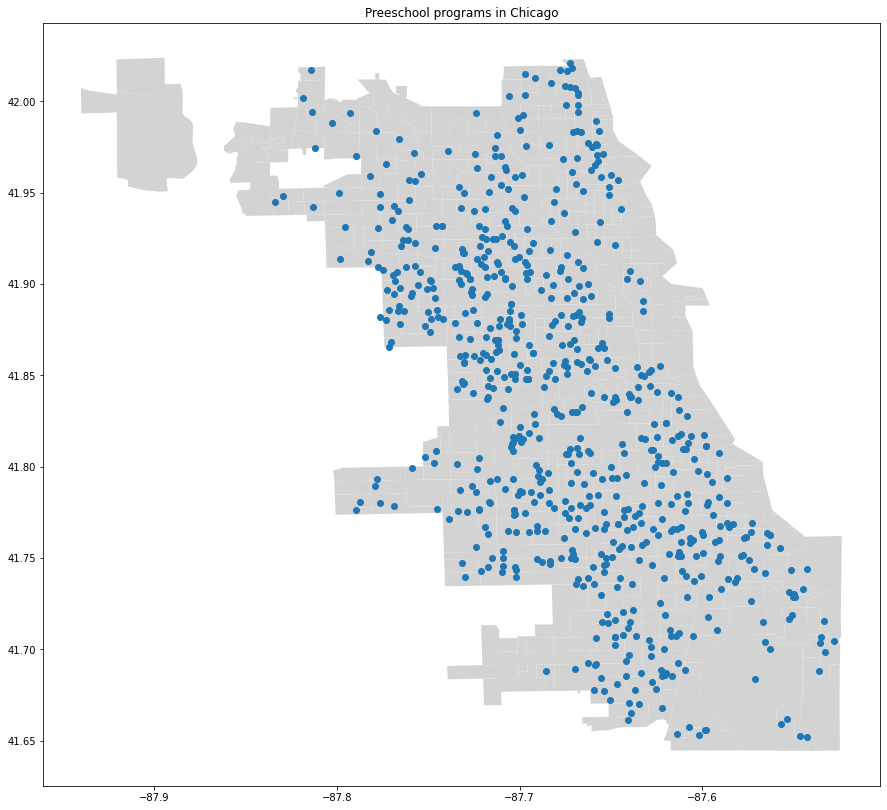

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
preschool_geo.plot(ax = ax)
ax.set_title('Preeschool programs in Chicago')

## After school programs

In [ ]:
after_school_api = 'https://data.cityofchicago.org/resource/83yd-jxxw.json'
after_school = pd.read_json(after_school_api)

In [ ]:
after_school.head()

,school_id,legacy_unit_id,finance_id,short_name,long_name,primary_category,is_high_school,is_middle_school,is_elementary_school,is_pre_school,summary,administrator_title,administrator,secondary_contact_title,secondary_contact,address,city,state,zip,phone,fax,cps_school_profile,website,attendance_boundaries,grades_offered_all,grades_offered,student_count_total,student_count_low_income,student_count_special_ed,student_count_english_learners,student_count_black,student_count_hispanic,student_count_white,student_count_asian,student_count_native_american,student_count_other_ethnicity,student_count_asian_pacific,student_count_multi,student_count_hawaiian_pacific,student_count_ethnicity_not,...,is_gocps_prek,is_gocps_elementary,is_gocps_high_school,open_for_enrollment_date,school_latitude,school_longitude,location,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,preschool_inclusive,preschool_instructional,twitter,third_contact_title,third_contact_name,fourth_contact_title,fourth_contact_name,fifth_contact_title,fifth_contact_name,sixth_contact_title,sixth_contact_name,facebook,freshman_start_end_time,classroom_languages,refugee_services,college_enrollment_rate_school,college_enrollment_rate_mean,graduation_rate_school,graduation_rate_mean,transportation_metra,visual_impairments,hard_of_hearing,seventh_contact_title,seventh_contact_name,youtube,significantly_modified,closed_for_enrollment_date,pinterest
0,610231,6480,32031,NATIONAL TEACHERS,National Teachers Elementary Academy,ES,False,True,True,True,NTA is a uniquely designed neighborhood school...,Principal,Teneka Joi Brooks,Assistant Principal,Courtney Langston,55 W CERMAK RD,Chicago,Illinois,60616,773-534-9970,773-534-9971,{'url': 'https://www.cps.edu/schools/schoolpro...,{'url': 'https://ntacourage.org'},True,"PK,K,1,2,3,4,5,6,7,8","PK,K-8",728,408,53,23,514,49,76,36,2,0,0,32,2,17,...,False,1.0,False,2004-09-01T00:00:00.000,41.852800,-87.629308,"{'type': 'Point', 'coordinates': [-87.629308, ...",40,34,21194,193,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,610520,8040,29101,LASALLE II,LaSalle II Magnet Elementary School,ES,False,True,True,True,"Acquisition of a second language (Arabic, Chin...",Principal,Lauren A. Albani,Assistant Principal,Bridget Malinowski,1148 N HONORE ST,Chicago,Illinois,60622,773-534-0490,773-534-0491,{'url': 'https://www.cps.edu/schools/schoolpro...,{'url': 'http://www.lasalle2school.com'},False,"PK,K,1,2,3,4,5,6,7,8","PK,K-8",581,173,76,59,112,244,168,15,2,0,0,36,4,0,...,False,1.0,False,2008-07-01T00:00:00.000,41.902914,-87.673696,"{'type': 'Point', 'coordinates': [-87.673696, ...",4,25,21560,462,41,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,609981,3890,23671,HEARST,Phoebe Apperson Hearst Elementary School,ES,False,True,True,True,Phoebe A. Hearst is a neighborhood public scho...,Principal,Teresa Helen Chrobak-Prince,Assistant Principal,NaN,4640 S LAMON AVE,Chicago,Illinois,60638,773-535-2376,773-535-2341,{'url': 'https://www.cps.edu/schools/schoolpro...,{'url': 'https://www.hearst.cps.edu'},True,"PK,K,1,2,3,4,5,6,7,8","PK,K-8",307,233,110,90,101,198,4,1,1,0,0,2,0,0,...,False,1.0,False,2004-09-01T00:00:00.000,41.808175,-87.745726,"{'type': 'Point', 'coordinates': [-87.745726, ...",7,53,22268,604,28,1.0,1.0,{'url': 'https://twitter.com/HearstWarriors'},School Clerk,Felix Mejia,Couselor,Samantha Pentz,Case Manager,Stacy Czub,Terry Bentley,Dean of Students,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,610530,2015,22251,SOUTH SHORE ES,South Shore Fine Arts Academy,ES,False,True,True,True,South Shore Fine Arts Academy builds on its mo...,Principal,Vicki H Brown,Clerk,Anidra Taylor,1415 E 70TH ST,Chicago,Illinois,60637,773-535-8340,773-535-8341,{'url': 'https://www.cps.edu/schools/schoolpro...,{'url': 'https://

In [ ]:
after_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 99 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   school_id                       655 non-null    int64  
 1   legacy_unit_id                  655 non-null    int64  
 2   finance_id                      655 non-null    int64  
 3   short_name                      655 non-null    object 
 4   long_name                       655 non-null    object 
 5   primary_category                655 non-null    object 
 6   is_high_school                  655 non-null    bool   
 7   is_middle_school                655 non-null    bool   
 8   is_elementary_school            655 non-null    bool   
 9   is_pre_school                   655 non-null    bool   
 10  summary                         647 non-null    object 
 11  administrator_title             655 non-null    object 
 12  administrator                   643 

In [ ]:
location_null = after_school['latitude'].isnull().sum()
print(location_null)
location_null_array.append(location_null)

0


In [ ]:
n_after_school = after_school.shape[0]

lat_col = []
lon_col = []

for i in range(n_after_school):
  location = after_school.location[i]
  try:
    #print(location['latitude'])
    lat_col.append(location['coordinates'][1])
    lon_col.append(location['coordinates'][0])
  except:
    lat_col.append(np.nan)
    lon_col.append(np.nan)

In [ ]:
after_school['latitude'] = lat_col
after_school['longitude'] = lon_col

In [ ]:
after_school_geo = gpd.GeoDataFrame(after_school, geometry = gpd.points_from_xy(after_school.longitude, after_school.latitude))

Text(0.5, 1.0, 'After school programs in Chicago')

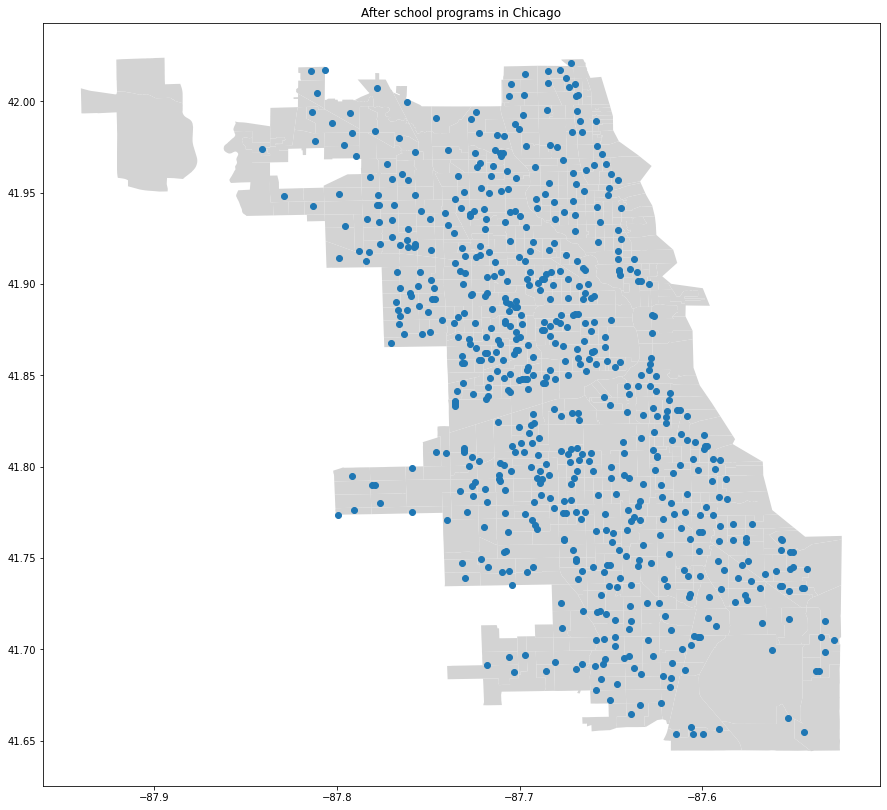

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
after_school_geo.plot(ax = ax)
ax.set_title('After school programs in Chicago')

## Vacant and abandoned buildings

In [ ]:
s311_api = 'https://data.cityofchicago.org/resource/v6vf-nfxy.json'
s311 = pd.read_json(s311_api)

In [ ]:
s311.head()

,sr_number,sr_type,sr_short_code,owner_department,status,created_date,last_modified_date,closed_date,street_address,city,state,zip_code,street_number,street_direction,street_name,street_type,duplicate,legacy_record,created_hour,created_day_of_week,created_month,community_area,ward,electricity_grid,police_sector,police_district,police_beat,precinct,x_coordinate,y_coordinate,latitude,longitude,location,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,parent_sr_number
0,SR21-01809304,311 INFORMATION ONLY CALL,311IOC,311 City Services,Completed,2021-10-12T12:15:11.000,2021-10-12T12:15:11.000,2021-10-12T12:15:11.000,2111 W Lexington ST,Chicago,Illinois,60612.0,2111.0,W,Lexington,ST,False,False,12,3,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SR21-01809303,Business Complaints / Reopening Issue,RBL,BACP - Business Affairs and Consumer Protection,Open,2021-10-12T12:14:48.000,2021-10-12T12:14:52.000,NaN,7138 S WESTERN AVE,NaN,NaN,60636.0,7138.0,S,WESTERN,AVE,False,False,12,3,10,66.0,18.0,J039,3.0,8.0,832.0,5.0,1.161470e+06,1.857064e+06,41.763466,-87.683747,"{'latitude': '41.763466337632835', 'longitude'...",58.0,64.0,22257.0,333.0,30.0,NaN
2,SR21-01809301,Aircraft Noise Complaint,AVN,Aviation,Completed,2021-10-12T12:14:37.000,2021-10-12T12:14:38.000,2021-10-12T12:14:37.000,10510 W ZEMKE RD,Chicago,IL,60666.0,10510.0,W,ZEMKE,RD,False,False,12,3,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SR21-01809300,311 INFORMATION ONLY CALL,311IOC,311 City Services,Completed,2021-10-12T12:14:32.000,2021-10-12T12:14:32.000,2021-10-12T12:14:32.000,2111 W Lexington ST,Chicago,Illinois,60612.0,2111.0,W,Lexington,ST,False,False,12,3,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SR21-01809299,Vicious Animal Complaint,EAF,Animal Care and Control,Open,2021-10-12T12:14:30.000,2021-10-12T12:14:32.000,NaN,7914 S TROY ST,NaN,NaN,60652.0,7914.0,S,TROY,ST,False,False,12,3,10,70.0,18.0,I041,3.0,8.0,835.0,16.0,1.156686e+06,1.851827e+06,41.749192,-87.701425,"{'latitude': '41.7491924088071', 'longitude': ...",8.0,69.0,4300.0,243.0,30.0,NaN


In [ ]:
s311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sr_number                    1000 non-null   object 
 1   sr_type                      1000 non-null   object 
 2   sr_short_code                1000 non-null   object 
 3   owner_department             1000 non-null   object 
 4   status                       1000 non-null   object 
 5   created_date                 1000 non-null   object 
 6   last_modified_date           1000 non-null   object 
 7   closed_date                  528 non-null    object 
 8   street_address               998 non-null    object 
 9   city                         456 non-null    object 
 10  state                        456 non-null    object 
 11  zip_code                     995 non-null    float64
 12  street_number                997 non-null    float64
 13  street_direction   

In [ ]:
s311.describe()

,zip_code,street_number,created_hour,created_day_of_week,created_month,community_area,ward,police_sector,police_district,police_beat,precinct,x_coordinate,y_coordinate,latitude,longitude,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
count,995.000000,997.000000,1000.000000,1000.0,1000.0,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,8.790000e+02,8.790000e+02,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,60626.555779,3862.615848,10.437000,3.0,10.0,33.574541,27.253440,2.092890,12.880734,1312.494266,29.255734,1.158525e+06,1.896577e+06,41.871935,-87.693514,29.044369,37.990899,19425.503982,290.754266,26.164960
std,20.160863,2930.062768,0.816516,0.0,0.0,20.559096,11.739176,0.947215,5.358727,536.193892,15.130203,1.822942e+04,2.890991e+04,0.079555,0.066476,14.665102,18.766092,5177.198066,272.299599,11.390215
min,60601.000000,15.000000,9.000000,3.0,10.0,1.000000,1.000000,1.000000,1.000000,111.000000,1.000000,1.105376e+06,1.817994e+06,41.655394,-87.887752,1.000000,1.000000,4299.000000,2.000000,1.000000
25%,60612.000000,2111.000000,10.000000,3.0,10.0,24.000000,21.000000,1.000000,11.000000,1113.000000,16.000000,1.153122e+06,1.889128e+06,41.851411,-87.712736,21.000000,28.000000,21184.000000,5.000000,23.000000
50%,60617.000000,2111.000000,10.000000,3.0,10.0,28.000000,28.000000,2.000000,12.000000,1225.000000,29.000000,1.162234e+06,1.896560e+06,41.871831,-87.679846,28.000000,29.000000,21184.000000,244.000000,23.000000
75%,60638.500000,5351.000000,11.000000,3.0,10.0,48.000000,35.250000,3.000000,16.000000,1654.000000,46.000000,1.166049e+06,1.915789e+06,41.924413,-87.665948,38.000000,53.000000,21861.000000,560.500000,34.000000
max,60827.000000,13200.000000,12.000000,3.0,10.0,77.000000,50.000000,5.000000,25.000000,2535.000000,52.000000,1.203418e+06,1.949426e+06,42.017584,-87.530742,61.000000,77.000000,22620.000000,801.000000,50.000000


In [ ]:
s311.isnull().sum()

sr_number                        0
sr_type                          0
sr_short_code                    0
owner_department                 0
status                           0
created_date                     0
last_modified_date               0
closed_date                    472
street_address                   2
city                           544
state                          544
zip_code                         5
street_number                    3
street_direction                 3
street_name                      2
street_type                      6
duplicate                        0
legacy_record                    0
created_hour                     0
created_day_of_week              0
created_month                    0
community_area                 128
ward                           128
electricity_grid               170
police_sector                  128
police_district                128
police_beat                    128
precinct                       128
x_coordinate        

In [ ]:
location_null = s311['latitude'].isnull().sum()
print(location_null)
location_null_array.append(location_null)

121


In [ ]:
s311_geo = gpd.GeoDataFrame(s311, geometry = gpd.points_from_xy(s311.longitude, s311.latitude))

Text(0.5, 1.0, 'Vacant and abandoned buildings in Chicago')

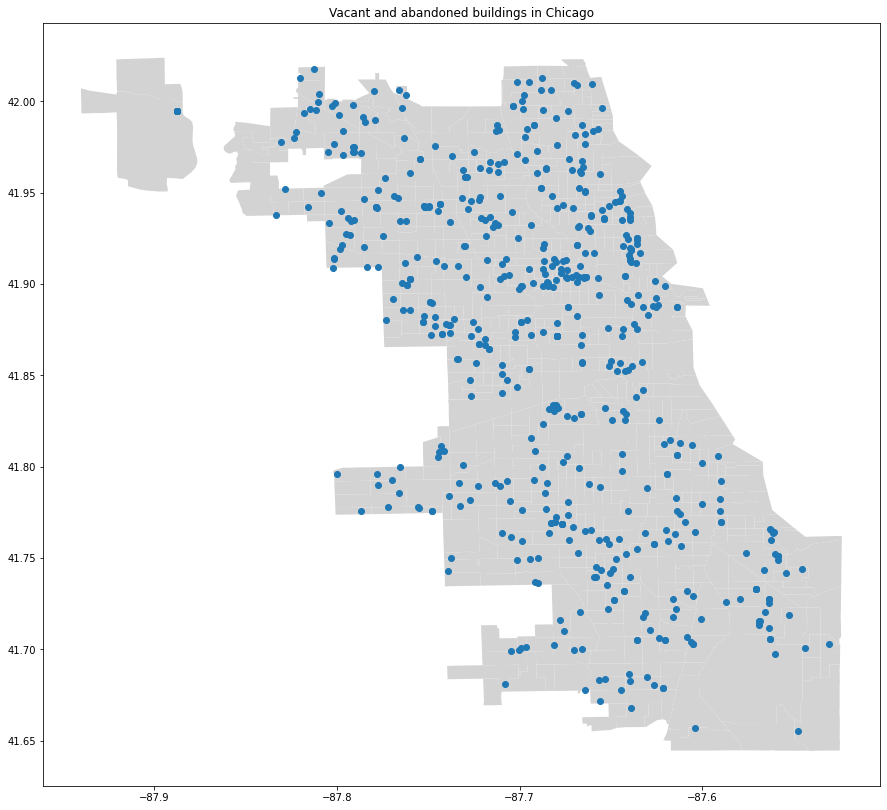

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
s311_geo.plot(ax = ax)
ax.set_title('Vacant and abandoned buildings in Chicago')

## WIC clinics

In [ ]:
wic_api = 'https://data.cityofchicago.org/resource/a7k7-a5bg.json'
wic = pd.read_json(wic_api)

In [ ]:
wic.head()

,:@computed_region_43wa_7qmu,wic,location,city,hours_of_operation,site_name,state,latitude,:@computed_region_awaf_s7ux,clinic_type,phone_2,zip,street_address,phone_1,longitude,:@computed_region_bdys_3d7i,:@computed_region_6mkv_f3dw,fax,site_number,:@computed_region_vrxf_vc4k,family_case_management,healthy_families_program,phone_3,phone_5,public_health_nursing,phone_4,healthy_start_program
0,26,Y,"{'latitude': '41.848583', 'needs_recoding': Fa...",Chicago,"Mon, Tues, Thurs & Fri: 8:00 a.m. - 4:30 p.m.;...",Alivio Medical Center,IL,41.848583,8,WIC Clinic,773-650-1205,60608,2355 S. Western Ave.,773-843-4220,-87.685394,204,14920,773-650-1232,106.0,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26,Y,"{'latitude': '41.85415', 'needs_recoding': Fal...",Chicago,Mon - Fri: 8:30 a.m. – 2:00 p.m.,Alivio Medical Center - Morgan,IL,41.854150,8,WIC Clinic,NaN,60608,966 W. 21st St.,312-829-6838,-87.653223,251,14920,312-949-7625,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24,Y,"{'latitude': '41.990601', 'needs_recoding': Fa...",Chicago,"Mon, Wed, Thurs & Fri: 9:00 a.m. - 5:00 p.m.; ...","Asian Human Services Family Health Center, Inc.",IL,41.990601,46,WIC Clinic,773-564-8114,60659,2424 W. Peterson Ave.,773-761-2324,-87.690739,31,4450,773-761-0009,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,45,Y,"{'latitude': '41.902212', 'needs_recoding': Fa...",Chicago,Mon - Fri: 8:00 a.m. - 4:00 p.m.,Austin Clinic,IL,41.902212,4,WIC Clinic,312-746-4796,60651,4909 W. Division St.,312-746-4797,-87.748845,585,4299,312-746-4799,19.0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,47,Y,"{'latitude': '41.729457', 'needs_recoding': Fa...",Chicago,Mon - Fri: 8:00 a.m. - 4:00 p.m.,Chicago Family Health Center,IL,41.729457,47,WIC Clinic,NaN,60617,9119 S. Exchange Ave.,"773-768-0373 ext. 1180, 1181, 1182",-87.552478,510,21202,773-768-5264,33.0,42,Y,Y,NaN,NaN,NaN,NaN,NaN


In [ ]:
wic.describe()

,:@computed_region_43wa_7qmu,latitude,:@computed_region_awaf_s7ux,zip,longitude,:@computed_region_bdys_3d7i,:@computed_region_6mkv_f3dw,site_number,:@computed_region_vrxf_vc4k
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,11.000000,15.000000
mean,25.733333,41.858797,28.133333,60622.266667,-87.662608,347.333333,17541.400000,42.545455,31.533333
std,16.542010,0.068718,18.062853,16.477113,0.049364,207.144762,6134.841025,44.493513,16.672761
min,1.000000,41.729457,4.000000,60604.000000,-87.748845,20.000000,4299.000000,1.000000,1.000000
25%,9.500000,41.818384,9.000000,60609.000000,-87.689259,227.500000,14920.000000,14.500000,25.000000
50%,26.000000,41.854150,32.000000,60617.000000,-87.666013,302.000000,21194.000000,23.000000,32.000000
75%,40.000000,41.898609,46.500000,60627.500000,-87.634471,475.000000,21560.000000,68.000000,35.500000
max,49.000000,41.990601,53.000000,60659.000000,-87.552478,793.000000,22616.000000,121.000000,66.000000


In [ ]:
wic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   :@computed_region_43wa_7qmu  15 non-null     int64  
 1   wic                          15 non-null     object 
 2   location                     15 non-null     object 
 3   city                         15 non-null     object 
 4   hours_of_operation           15 non-null     object 
 5   site_name                    15 non-null     object 
 6   state                        15 non-null     object 
 7   latitude                     15 non-null     float64
 8   :@computed_region_awaf_s7ux  15 non-null     int64  
 9   clinic_type                  15 non-null     object 
 10  phone_2                      12 non-null     object 
 11  zip                          15 non-null     int64  
 12  street_address               15 non-null     object 
 13  phone_1               

In [ ]:
wic.isnull().sum()

:@computed_region_43wa_7qmu     0
wic                             0
location                        0
city                            0
hours_of_operation              0
site_name                       0
state                           0
latitude                        0
:@computed_region_awaf_s7ux     0
clinic_type                     0
phone_2                         3
zip                             0
street_address                  0
phone_1                         0
longitude                       0
:@computed_region_bdys_3d7i     0
:@computed_region_6mkv_f3dw     0
fax                             0
site_number                     4
:@computed_region_vrxf_vc4k     0
family_case_management         10
healthy_families_program       14
phone_3                         8
phone_5                        12
public_health_nursing          13
phone_4                        11
healthy_start_program          14
dtype: int64

In [ ]:
location_null = wic['latitude'].isnull().sum()
print(location_null)
location_null_array.append(location_null)

0


In [ ]:
wic_geo = gpd.GeoDataFrame(wic, geometry = gpd.points_from_xy(wic.longitude, wic.latitude))

Text(0.5, 1.0, 'WIC clinics in Chicago')

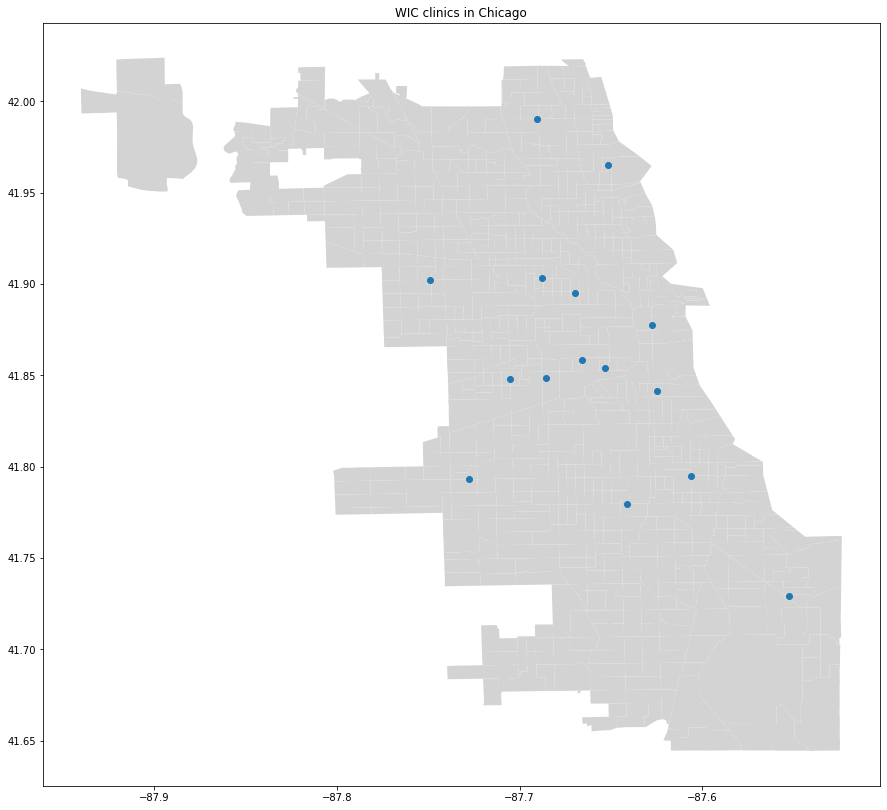

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
wic_geo.plot(ax = ax)
ax.set_title('WIC clinics in Chicago')

## Primary care clinics

In [ ]:
pcc_api = 'https://data.cityofchicago.org/resource/cjg8-dbka.json'
pcc = pd.read_json(pcc_api)

In [ ]:
pcc.head()

,facility,community_area,phone,fqhc_look_alike_or_neither_special_notes,location_1,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_awaf_s7ux
0,Mercy Family Health Center @ Oakwood Shores,OAKLAND (36),(773) 451-0460,Look-alike,"{'latitude': '41.826722480000456', 'longitude'...",36.0,2.0,4301,221.0,10.0,1.0
1,ACCESS Southwest Family Health Center,GARFIELD RIDGE (56),(866) 882-2237,FQHC,"{'latitude': '41.80757461200045', 'longitude':...",7.0,53.0,22268,605.0,28.0,35.0
2,Heartland Health Outreach- Refugee Health,UPTOWN (3),(773) 751-1744,FQHC; specialize in refugee health,"{'latitude': '41.96843068300046', 'longitude':...",15.0,31.0,22616,241.0,39.0,37.0
3,Heartland Health Center- Hibbard Elementary Sc...,ALBANY PARK (14),(773) 336-6100,FQHC; School-based health center (open to comm...,"{'latitude': '41.97084703000047', 'longitude':...",20.0,14.0,21849,750.0,20.0,28.0
4,Near North - Winfield Moody Health Center,NEAR NORTH SIDE (8),(312) 337-1073,FQHC,"{'latitude': '41.90535451700049', 'longitude':...",54.0,37.0,14926,309.0,46.0,41.0


In [ ]:
n_pcc = pcc.shape[0]

In [ ]:
lat_col = []
lon_col = []
for i in range(n_pcc):
  location = pcc.location_1[i]
  try:
    #print(location['latitude'])
    lat_col.append(location['latitude'])
    lon_col.append(location['longitude'])
  except:
    lat_col.append(np.nan)
    lon_col.append(np.nan)

In [ ]:
pcc['latitude'] = lat_col
pcc['longitude'] = lon_col

In [ ]:
pcc.describe()

,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_awaf_s7ux
count,119.000000,119.000000,120.000000,119.000000,119.000000,119.000000
mean,30.453782,33.798319,18708.675000,364.504202,24.008403,25.352941
std,19.533000,19.597466,5680.408877,218.957541,16.274393,16.165766
min,1.000000,1.000000,3906.000000,2.000000,1.000000,1.000000
25%,11.500000,24.000000,14924.000000,195.000000,9.000000,11.500000
50%,32.000000,31.000000,21560.000000,341.000000,23.000000,24.000000
75%,43.000000,50.500000,21867.000000,545.500000,41.000000,39.000000
max,61.000000,76.000000,22616.000000,790.000000,49.000000,53.000000


In [ ]:
pcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   facility                                  120 non-null    object 
 1   community_area                            120 non-null    object 
 2   phone                                     120 non-null    object 
 3   fqhc_look_alike_or_neither_special_notes  120 non-null    object 
 4   location_1                                120 non-null    object 
 5   :@computed_region_rpca_8um6               119 non-null    float64
 6   :@computed_region_vrxf_vc4k               119 non-null    float64
 7   :@computed_region_6mkv_f3dw               120 non-null    int64  
 8   :@computed_region_bdys_3d7i               119 non-null    float64
 9   :@computed_region_43wa_7qmu               119 non-null    float64
 10  :@computed_region_awaf_s7ux           

In [ ]:
pcc.isnull().sum()

facility                                    0
community_area                              0
phone                                       0
fqhc_look_alike_or_neither_special_notes    0
location_1                                  0
:@computed_region_rpca_8um6                 1
:@computed_region_vrxf_vc4k                 1
:@computed_region_6mkv_f3dw                 0
:@computed_region_bdys_3d7i                 1
:@computed_region_43wa_7qmu                 1
:@computed_region_awaf_s7ux                 1
latitude                                    0
longitude                                   0
dtype: int64

In [ ]:
location_null = pcc['latitude'].isnull().sum()
print(location_null)
location_null_array.append(location_null)

0


In [ ]:
pcc_geo = gpd.GeoDataFrame(pcc, geometry = gpd.points_from_xy(pcc.longitude, pcc.latitude))

Text(0.5, 1.0, 'Primary care clinics in Chicago')

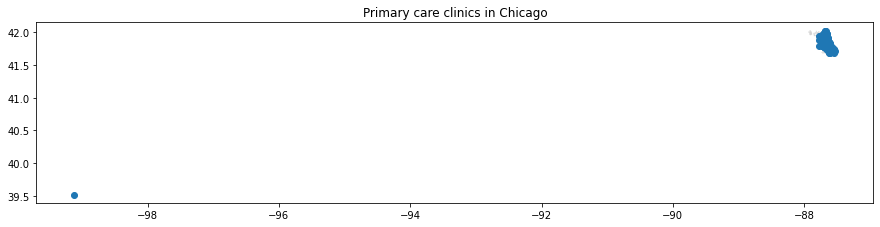

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
pcc_geo.plot(ax = ax)
ax.set_title('Primary care clinics in Chicago')

## Asbestos and demolition notification

In [ ]:
asbestos_api = 'https://data.cityofchicago.org/resource/qhb4-qx8k.json'
asbestos = pd.read_json(asbestos_api)

In [ ]:
asbestos.head()

,notification_type,address,street_number,direction,street_name,street_type,notification_from,start_date,end_date,data_source,modified_date,comment,latitude,longitude,location,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_awaf_s7ux,street_number_to
0,NOI DEMO/RENOVATION,1 W IRVING PARK RD,1,W,IRVING PARK,RD,PUBLIC BLDG. COMM. OF CHICAGO,2000-06-09T00:00:00.000,2000-06-19T00:00:00.000,HISTORIC DEPT. OF ENVIRONMENT,2012-01-01T00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NOI DEMO/RENOVATION,1000 W WASHINGTON ST,1000,W,WASHINGTON,ST,"1000 WEST WASHINGTON LOFTS, LCC",1995-03-13T00:00:00.000,1995-05-22T00:00:00.000,HISTORIC DEPT. OF ENVIRONMENT,2012-01-01T00:00:00.000,DOWN AND COMPLETED.,41.883172,-87.652133,"{'type': 'Point', 'coordinates': [-87.65213310...",44.0,29.0,14917.0,63.0,46.0,41.0,NaN
2,NOI DEMO/RENOVATION,1012 W DIVERSEY AVE,1012,W,DIVERSEY,AVE,1012 W DIVERSEY L.L.C.,1998-11-11T00:00:00.000,NaN,HISTORIC DEPT. OF ENVIRONMENT,2012-01-01T00:00:00.000,NaN,41.932737,-87.654406,"{'type': 'Point', 'coordinates': [-87.65440602...",22.0,57.0,21190.0,680.0,25.0,38.0,NaN
3,NOI DEMO/RENOVATION,10312 S CORLISS AVE,10312,S,CORLISS,AVE,CITY OF CHICAGO,2002-04-26T00:00:00.000,NaN,HISTORIC DEPT. OF ENVIRONMENT,2012-01-01T00:00:00.000,NaN,41.707047,-87.604148,"{'type': 'Point', 'coordinates': [-87.60414838...",19.0,47.0,21861.0,254.0,43.0,30.0,NaN
4,NOI DEMO/RENOVATION,1036 N WOOD ST,1036,N,WOOD,ST,S+R,2003-11-07T00:00:00.000,NaN,HISTORIC DEPT. OF ENVIRONMENT,2012-01-01T00:00:00.000,NaN,41.900673,-87.672461,"{'type': 'Point', 'coordinates': [-87.67246064...",4.0,25.0,21560.0,462.0,41.0,24.0,NaN


In [ ]:
asbestos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   notification_type            992 non-null    object 
 1   address                      1000 non-null   object 
 2   street_number                1000 non-null   int64  
 3   direction                    1000 non-null   object 
 4   street_name                  1000 non-null   object 
 5   street_type                  993 non-null    object 
 6   notification_from            973 non-null    object 
 7   start_date                   1000 non-null   object 
 8   end_date                     551 non-null    object 
 9   data_source                  1000 non-null   object 
 10  modified_date                1000 non-null   object 
 11  comment                      594 non-null    object 
 12  latitude                     958 non-null    float64
 13  longitude          

In [ ]:
asbestos.describe()

,street_number,latitude,longitude,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_awaf_s7ux,street_number_to
count,1000.000000,958.000000,958.000000,950.000000,950.000000,958.000000,955.000000,950.000000,950.000000,70.000000
mean,3128.612000,41.856465,-87.666918,27.870526,42.541053,18015.038622,393.915183,28.931579,28.491579,2719.914286
std,3366.799792,0.091621,0.046030,17.851662,18.444057,6243.183894,233.173252,13.645232,14.109740,2870.599739
min,1.000000,41.647440,-87.914428,1.000000,1.000000,4299.000000,1.000000,1.000000,1.000000,18.000000
25%,1255.750000,41.787789,-87.680085,15.000000,26.000000,14920.000000,192.500000,18.000000,16.000000,1179.000000
50%,1738.500000,41.886038,-87.664791,22.500000,38.000000,21538.000000,378.000000,32.000000,26.000000,1629.000000
75%,3457.000000,41.918347,-87.642667,43.000000,57.000000,21861.000000,622.000000,41.000000,41.000000,2734.750000
max,13625.000000,42.018574,-87.527019,61.000000,77.000000,22620.000000,800.000000,50.000000,53.000000,11756.000000


In [ ]:
asbestos.isnull().sum()

notification_type                8
address                          0
street_number                    0
direction                        0
street_name                      0
street_type                      7
notification_from               27
start_date                       0
end_date                       449
data_source                      0
modified_date                    0
comment                        406
latitude                        42
longitude                       42
location                        42
:@computed_region_rpca_8um6     50
:@computed_region_vrxf_vc4k     50
:@computed_region_6mkv_f3dw     42
:@computed_region_bdys_3d7i     45
:@computed_region_43wa_7qmu     50
:@computed_region_awaf_s7ux     50
street_number_to               930
dtype: int64

In [ ]:
asbestos_geo = gpd.GeoDataFrame(asbestos, geometry = gpd.points_from_xy(asbestos.longitude, asbestos.latitude))

Text(0.5, 1.0, 'Asbestos and demolition notification in Chicago')

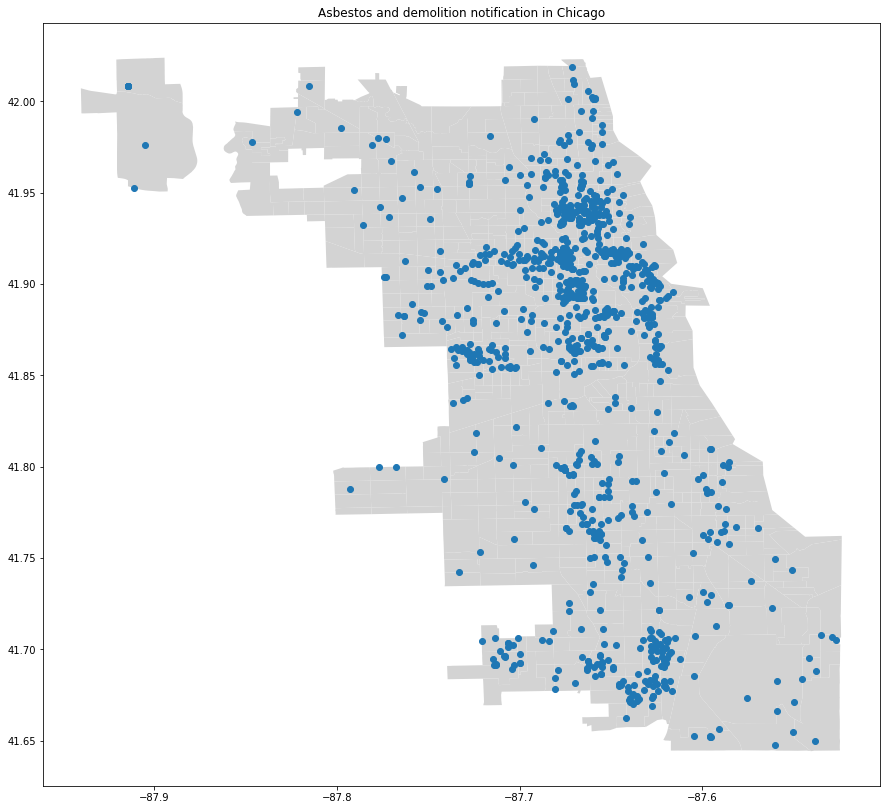

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
asbestos_geo.plot(ax = ax)
ax.set_title('Asbestos and demolition notification in Chicago')

In [ ]:
location_null = asbestos['latitude'].isnull().sum()
print(location_null)
location_null_array.append(location_null)

42


##Bus routes

In [ ]:
kmz = ZipFile('CTA_BusRoutes.kmz', 'r')
kmz.extract('doc.kml')
bus_route = gpd.read_file('doc.kml')

In [ ]:
bus_route.head()

## Public health metrics

In [ ]:
public_health_metrics_api = 'https://data.cityofchicago.org/resource/iqnk-2tcu.json'
public_health = pd.read_json(public_health_metrics_api)

In [ ]:
public_health.head()

,community_area,community_area_name,birth_rate,general_fertility_rate,low_birth_weight,prenatal_care_beginning_in_first_trimester,preterm_births,teen_birth_rate,assault_homicide,breast_cancer_in_females,cancer_all_sites,colorectal_cancer,diabetes_related,firearm_related,infant_mortality_rate,lung_cancer,prostate_cancer_in_males,stroke_cerebrovascular_disease,childhood_blood_lead_level_screening,childhood_lead_poisoning,gonorrhea_in_females,gonorrhea_in_males,tuberculosis,below_poverty_level,crowded_housing,dependency,no_high_school_diploma,per_capita_income,unemployment
0,1,Rogers Park,16.4,62.0,11.0,73.0,11.2,40.8,7.7,23.3,176.9,25.3,77.1,5.2,6.4,36.7,21.7,33.7,364.7,0.5,322.5,423.3,11.4,22.7,7.9,28.8,18.1,23714,7.5
1,2,West Ridge,17.3,83.3,8.1,71.1,8.3,29.9,5.8,20.2,155.9,17.3,60.5,3.7,5.1,36.0,14.2,34.7,331.4,1.0,141.0,205.7,8.9,15.1,7.0,38.3,19.6,21375,7.9
2,3,Uptown,13.1,50.5,8.3,77.7,10.3,35.1,5.4,21.3,183.3,20.5,80.0,4.6,6.5,50.5,25.2,41.7,353.7,0.5,170.8,468.7,13.6,22.7,4.6,22.2,13.6,32355,7.7
3,4,Lincoln Square,17.1,61.0,8.1,80.5,9.7,38.4,5.0,21.7,153.2,8.6,55.4,6.1,3.8,43.1,27.6,36.9,273.3,0.4,98.8,195.5,8.5,9.5,3.1,25.6,12.5,35503,6.8
4,5,North Center,22.4,76.2,9.1,80.4,9.8,8.4,1.0,16.6,152.1,26.1,49.8,1.0,2.7,42.4,15.1,41.6,178.1,0.9,85.4,188.6,1.9,7.1,0.2,25.5,5.4,51615,4.5


In [ ]:
public_health.describe()

,community_area,birth_rate,general_fertility_rate,low_birth_weight,prenatal_care_beginning_in_first_trimester,preterm_births,teen_birth_rate,assault_homicide,breast_cancer_in_females,cancer_all_sites,colorectal_cancer,diabetes_related,firearm_related,infant_mortality_rate,lung_cancer,prostate_cancer_in_males,stroke_cerebrovascular_disease,childhood_blood_lead_level_screening,childhood_lead_poisoning,gonorrhea_in_females,tuberculosis,below_poverty_level,crowded_housing,dependency,no_high_school_diploma,per_capita_income,unemployment
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,65.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,15.698701,68.394805,10.101299,76.954545,11.264935,50.064935,18.068831,25.951948,194.277922,21.584416,71.937662,16.731169,8.574026,51.481818,36.805195,46.544156,385.294737,0.863158,894.287692,6.844156,20.292208,4.912987,35.829870,21.596104,25106.740260,13.303896
std,22.371857,3.528735,15.257465,3.913926,5.245714,3.016916,28.097817,16.561077,9.557590,45.652058,7.695335,21.497999,14.462222,4.408765,16.439928,20.595189,14.448570,119.869133,0.772846,894.921927,4.587956,11.496988,3.657341,7.269802,12.354995,14952.672297,7.031965
min,1.000000,9.400000,27.700000,3.500000,63.600000,5.000000,1.300000,0.000000,7.600000,120.100000,8.600000,26.800000,1.000000,1.500000,15.900000,0.000000,22.000000,133.600000,0.000000,50.300000,0.000000,3.100000,0.200000,15.500000,2.900000,8535.000000,4.200000
25%,20.000000,12.900000,60.100000,7.300000,73.300000,8.800000,33.700000,4.900000,20.200000,152.900000,15.100000,58.600000,5.500000,5.100000,37.700000,19.700000,37.900000,310.550000,0.300000,141.400000,3.000000,12.000000,2.000000,32.300000,13.400000,15467.000000,7.800000
50%,39.000000,15.700000,68.300000,8.700000,76.100000,10.800000,49.200000,10.800000,24.000000,189.400000,21.900000,73.000000,10.600000,8.100000,50.000000,32.100000,43.100000,389.350000,0.700000,529.000000,6.500000,18.200000,4.200000,38.300000,18.500000,20489.000000,11.500000
75%,58.000000,18.500000,80.700000,12.700000,80.400000,13.700000,67.900000,32.200000,32.700000,235.200000,27.100000,83.900000,25.800000,11.400000,63.800000,51.400000,53.500000,484.125000,1.125000,1512.000000,9.400000,26.100000,6.800000,40.900000,29.400000,29026.000000,17.400000
max,77.000000,22.400000,94.900000,19.700000,94.500000,17.500000,116.900000,70.300000,54.700000,291.500000,39.400000,119.100000,70.300000,22.600000,89.600000,92.900000,99.100000,605.900000,3.700000,3193.300000,22.700000,61.400000,17.600000,50.200000,58.700000,87163.000000,40.000000


In [ ]:
public_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 29 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   community_area                              77 non-null     int64  
 1   community_area_name                         77 non-null     object 
 2   birth_rate                                  77 non-null     float64
 3   general_fertility_rate                      77 non-null     float64
 4   low_birth_weight                            77 non-null     float64
 5   prenatal_care_beginning_in_first_trimester  77 non-null     float64
 6   preterm_births                              77 non-null     float64
 7   teen_birth_rate                             77 non-null     float64
 8   assault_homicide                            77 non-null     float64
 9   breast_cancer_in_females                    77 non-null     float64
 10  cancer_all_sites

In [ ]:
public_health.isnull().sum()

##Foreclosures

In [ ]:
foreclosures_api = 'https://datacatalog.cookcountyil.gov/resource/nk2q-7kjv.json'
foreclosures = pd.read_json(foreclosures_api)

In [ ]:
foreclosures.head()

,zip_code,location,:@computed_region_tu5p_2ban,city,recorded_date,state,document_type,:@computed_region_h3ai_7k6i,:@computed_region_nqe2_pztc,pin,execution_date,document_number,street,consideration_amount
0,60008-2004,"{'latitude': '42.08563190500007', 'human_addre...",4097.0,ROLLING MEADOWS,2015-03-27T00:00:00.000,IL,LIS PENDENS FORECLOSURE,324.0,14.0,02-26-306-051-0000,2015-03-24T00:00:00.000,1508645069,2310 KIETH CT,NaN
1,60173-0000,"{'latitude': '42.07519157000007', 'human_addre...",16177.0,SCHAUMBURG,2015-03-27T00:00:00.000,IL,LIS PENDENS FORECLOSURE,424.0,14.0,02-33-204-010-1028,2015-03-25T00:00:00.000,1508619160,2650 COLLEGE DR,NaN
2,60004-7135,"{'latitude': '42.14316735400007', 'human_addre...",4091.0,ARLINGTON HEIGHTS,2015-03-27T00:00:00.000,IL,LIS PENDENS FORECLOSURE,657.0,14.0,03-06-400-058-1032,2015-03-26T00:00:00.000,1508645046,366 HAPPFIELD DR,NaN
3,60005-1279,"{'latitude': '42.08670139900005', 'human_addre...",4093.0,ARLINGTON HEIGHTS,2015-03-27T00:00:00.000,IL,LIS PENDENS FORECLOSURE,657.0,14.0,03-30-400-008-1001,2015-03-23T00:00:00.000,1508645036,904 W SAINT JAMES ST,NaN
4,60120-8532,"{'latitude': '42.01931786200004', 'human_addre...",15593.0,ELGIN,2015-03-27T00:00:00.000,IL,LIS PENDENS FORECLOSURE,693.0,15.0,06-19-313-013-0000,2015-03-20T00:00:00.000,1508619163,764 BLUFF CITY BLVD,NaN


In [ ]:
foreclosures.describe()

,:@computed_region_tu5p_2ban,:@computed_region_h3ai_7k6i,:@computed_region_nqe2_pztc,document_number,consideration_amount
count,912.000000,912.000000,912.000000,1.000000e+03,4.000000
mean,14780.186404,643.035088,7.880482,1.507890e+09,234332.750000
std,8042.236206,230.702946,5.097294,5.353603e+05,321507.169786
min,2306.000000,8.000000,1.000000,1.506916e+09,0.000000
25%,9015.000000,541.000000,4.000000,1.507522e+09,0.000000
50%,15069.000000,773.000000,6.000000,1.507909e+09,128000.000000
75%,21862.500000,788.000000,12.000000,1.508419e+09,362332.750000
max,26917.000000,790.000000,17.000000,1.508656e+09,681331.000000


In [ ]:
foreclosures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   zip_code                     912 non-null    object 
 1   location                     912 non-null    object 
 2   :@computed_region_tu5p_2ban  912 non-null    float64
 3   city                         912 non-null    object 
 4   recorded_date                1000 non-null   object 
 5   state                        912 non-null    object 
 6   document_type                1000 non-null   object 
 7   :@computed_region_h3ai_7k6i  912 non-null    float64
 8   :@computed_region_nqe2_pztc  912 non-null    float64
 9   pin                          1000 non-null   object 
 10  execution_date               738 non-null    object 
 11  document_number              1000 non-null   int64  
 12  street                       912 non-null    object 
 13  consideration_amoun

In [ ]:
foreclosures.isnull().sum()

zip_code                        88
location                        88
:@computed_region_tu5p_2ban     88
city                            88
recorded_date                    0
state                           88
document_type                    0
:@computed_region_h3ai_7k6i     88
:@computed_region_nqe2_pztc     88
pin                              0
execution_date                 262
document_number                  0
street                          88
consideration_amount           996
dtype: int64

In [ ]:
n_foreclosures = foreclosures.shape[0]

In [ ]:
lat_col = []
lon_col = []
for i in range(n_foreclosures):
  location = foreclosures.location[i]
  try:
    #print(location['latitude'])
    lat_col.append(location['latitude'])
    lon_col.append(location['longitude'])
  except:
    lat_col.append(np.nan)
    lon_col.append(np.nan)

In [ ]:
foreclosures['latitude'] = lat_col
foreclosures['longitude'] = lon_col

In [ ]:
foreclosures_geo = gpd.GeoDataFrame(foreclosures, geometry = gpd.points_from_xy(foreclosures.longitude, foreclosures.latitude))

Text(0.5, 1.0, 'Foreclosures in Chicago')

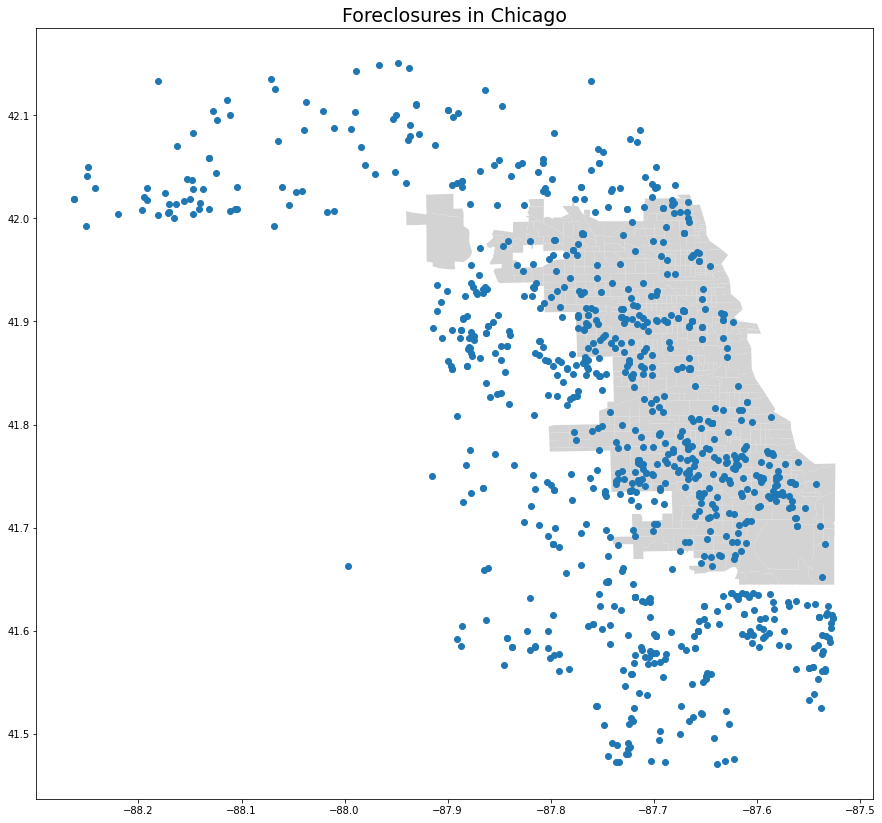

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
foreclosures_geo.plot(ax = ax)
ax.set_title('Foreclosures in Chicago', size = 19)

In [ ]:
location_null = foreclosures['latitude'].isnull().sum()
print(location_null)
location_null_array.append(location_null)

88


## Pedestrians and bikes

In [ ]:
pb = pd.read_json('Street_Count_Loc.json')

## Merging


In [ ]:
blocks.the_geom[0]

In [ ]:
joined_data = gpd.sjoin(blocks_geo,parks_geo, how = 'left', op= 'contains')
joined_data = joined_data.drop(['index_right'], axis = 1)
joined_data.tail()

In [ ]:
joined_data = gpd.sjoin(joined_data,energy_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [ ]:
joined_data = gpd.sjoin(joined_data,crime_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [ ]:
joined_data = gpd.sjoin(joined_data,traffic_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [ ]:
joined_data = gpd.sjoin(joined_data,air_quality_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [ ]:
joined_data = gpd.sjoin(joined_data,building_permit_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [ ]:
joined_data = gpd.sjoin(joined_data,beach_weather_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [ ]:
joined_data = gpd.sjoin(joined_data,graffiti_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [ ]:
joined_data = gpd.sjoin(joined_data,flu_shot_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [ ]:
joined_data = gpd.sjoin(joined_data,env_insp_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [ ]:
joined_data = gpd.sjoin(joined_data,grocery_store_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [ ]:
joined_data = gpd.sjoin(joined_data,preschool_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [ ]:
joined_data = gpd.sjoin(joined_data,after_school_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [ ]:
joined_data = gpd.sjoin(joined_data,asbestos_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [ ]:
joined_data = gpd.sjoin(joined_data,wic_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [ ]:
joined_data = gpd.sjoin(joined_data,pcc_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [ ]:
joined_data = gpd.sjoin(joined_data,s311_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [ ]:
joined_data.info()

In [ ]:
joined_data.describe()

In [ ]:
joined_data.head()

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
joined_data.plot(ax = ax)
ax.set_title('All data')

In [ ]:
joined_data.to_feather('/sociome')

## Plots

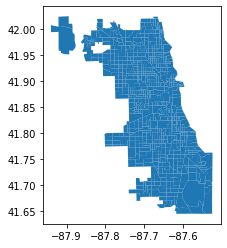

In [ ]:
chicago = gpd.read_file('chicago.shp')
chicago.plot()

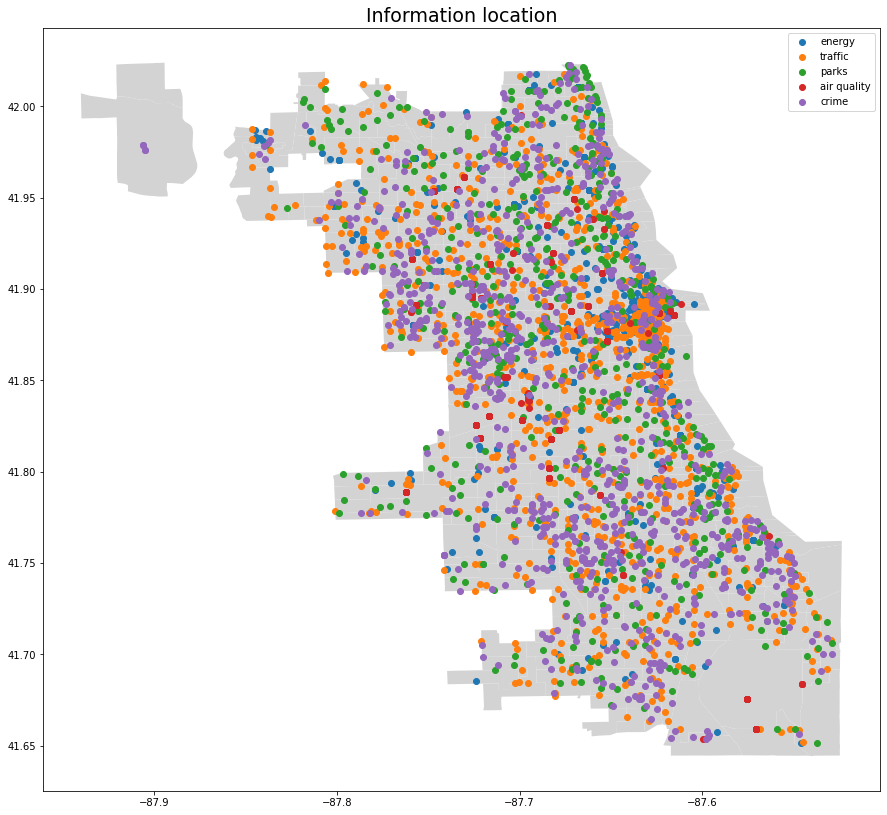

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
energy_geo.plot(ax = ax, label = 'energy')
traffic_geo.plot(ax = ax, label = 'traffic')
parks_geo.plot(ax = ax, label = 'parks')
air_quality_geo.plot(ax = ax, label = 'air quality')
crime_geo.plot(ax = ax, label = 'crime')
ax.set_title('Information location', size = 19)
ax.legend()

In [ ]:
#histograms
datapoints = np.array([581, 1000, 1000, 1000, 1000, 1000, 9, 1000, 1000, 1000, 1000, 264, 705, 635, 1000, 15, 120, 1000, 77])

variables = np.array([84, 23, 28, 15, 23, 108, 10, 23, 31, 23, 22, 11, 26, 99, 39, 27, 13, 22, 29])

Text(0.5, 1.0, 'Data points histogram')

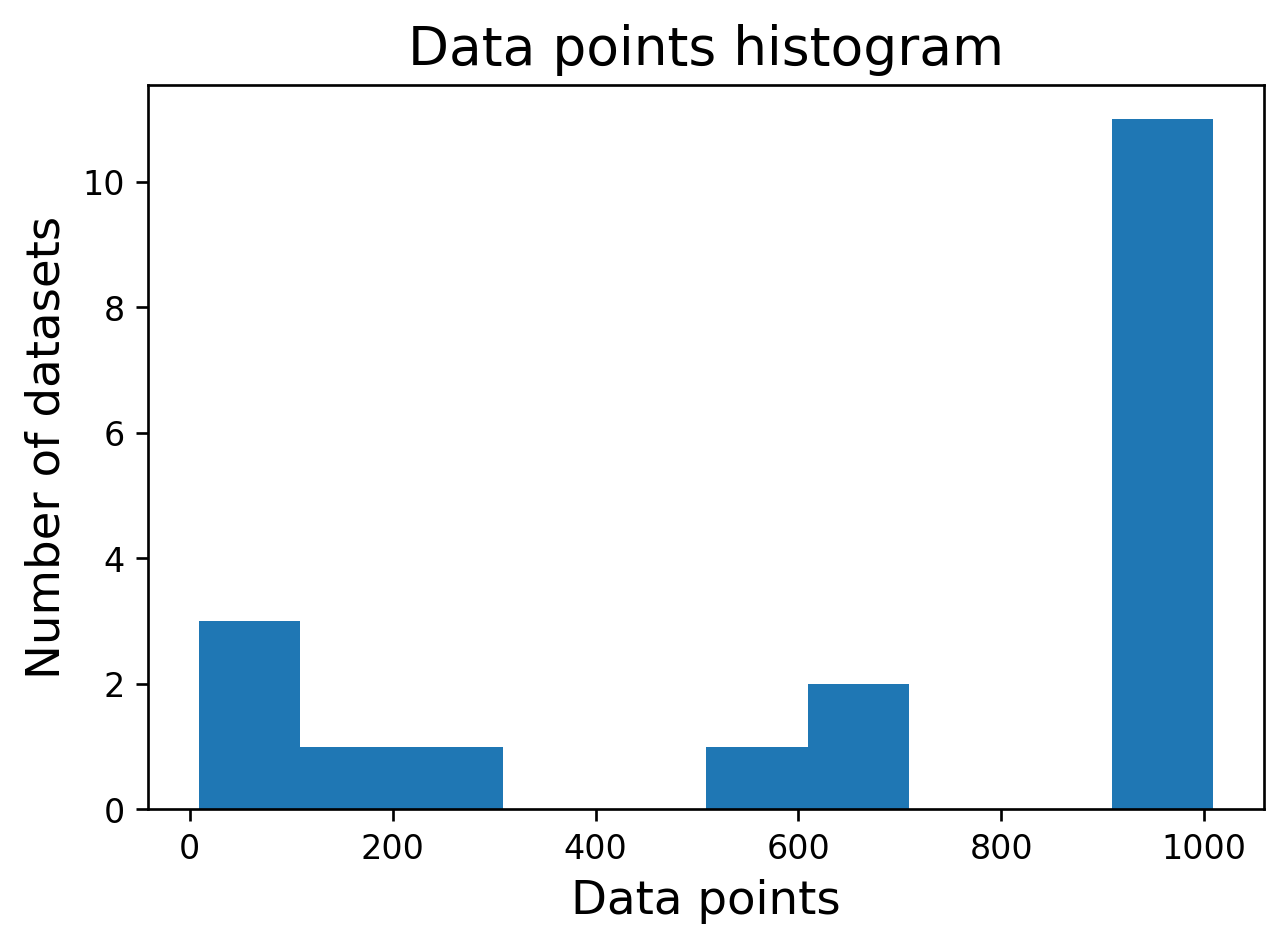

In [ ]:
plt.figure(dpi=240)
plt.hist(datapoints, bins=np.arange(datapoints.min(), datapoints.max()+25, 100))
plt.xlabel('Data points', size = 14)
plt.ylabel('Number of datasets', size = 14)
plt.title('Data points histogram', size = 16)

Text(0.5, 1.0, 'Variables histogram')

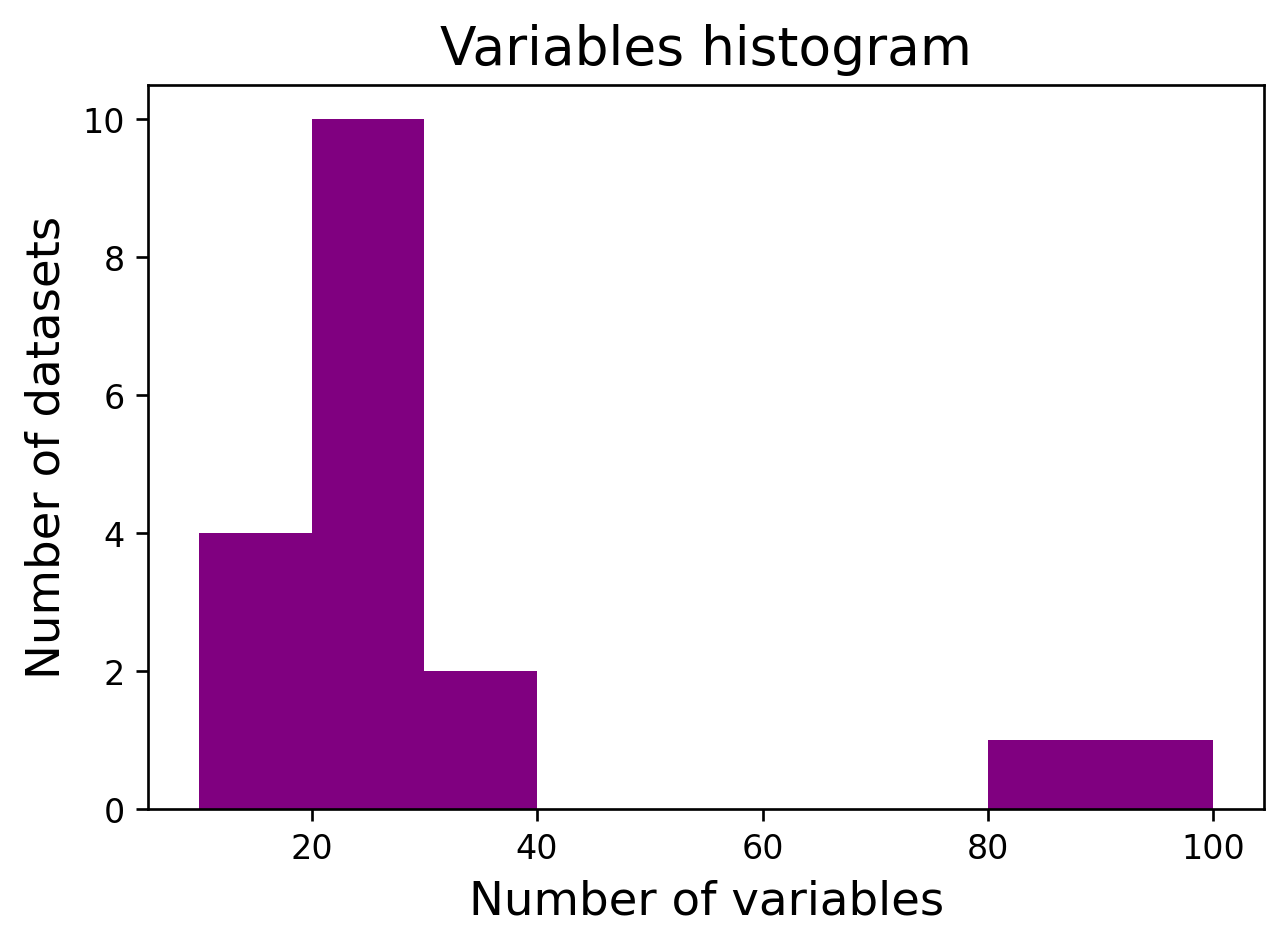

In [ ]:
plt.figure(dpi=240)
plt.hist(variables, bins=np.arange(variables.min(), variables.max()+1, 10), color = 'purple')
plt.xlabel('Number of variables', size = 14)
plt.ylabel('Number of datasets', size = 14)
plt.title('Variables histogram', size = 16)

In [ ]:
loc_null = location_null_array
loc_null = np.array(loc_null)

Text(0.5, 1.0, 'Missing values histogram')

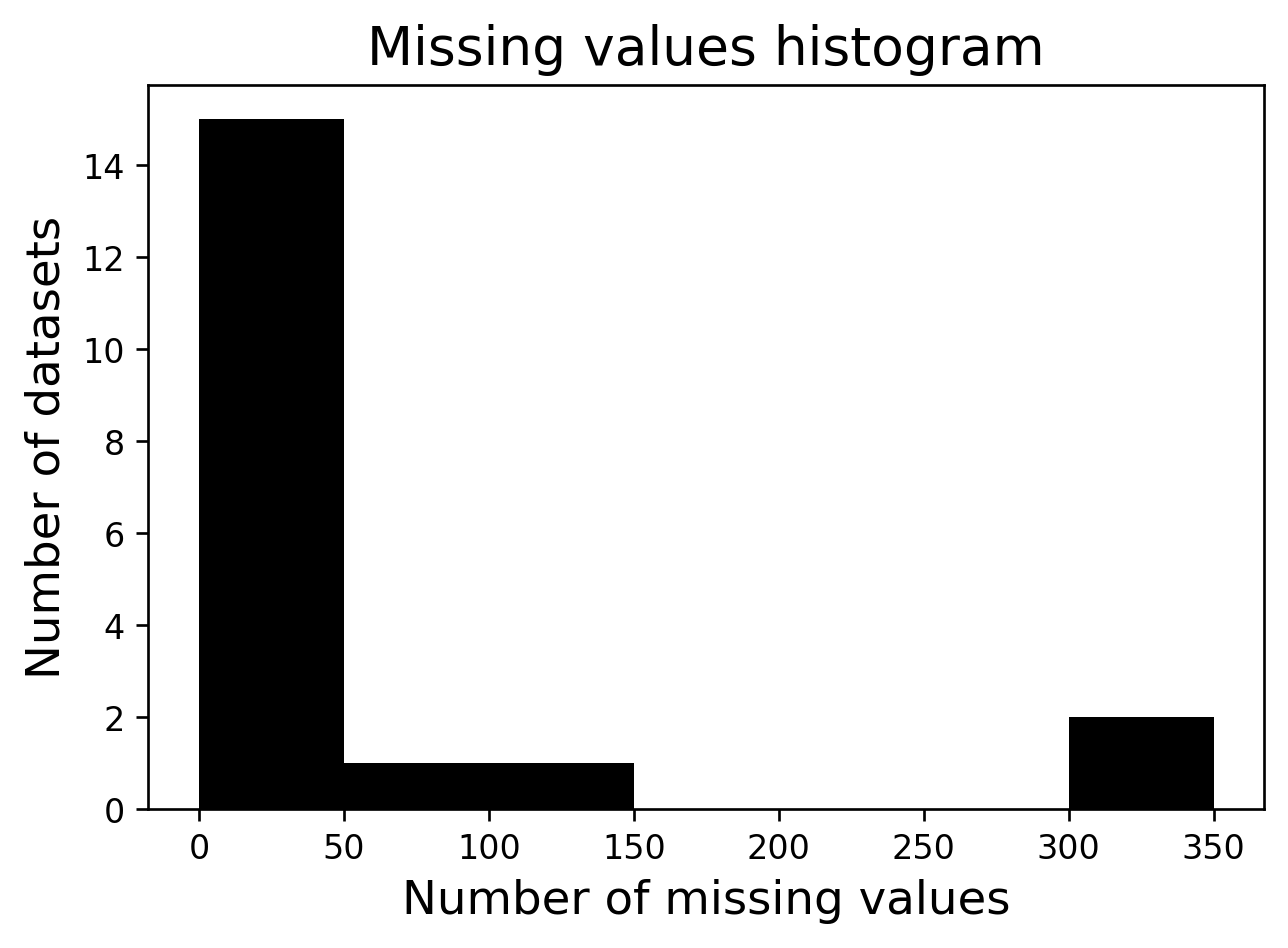

In [ ]:
plt.figure(dpi=240)
plt.hist(loc_null, bins=np.arange(loc_null.min(), loc_null.max()+25, 50), color = 'black')
plt.xlabel('Number of missing values', size = 14)
plt.ylabel('Number of datasets', size = 14)
plt.title('Missing values histogram', size = 16)

# SAve as pdf

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Sociome.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Sociome.ipynb to pdf
/bin/sh: 1: inkscape: not found
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/nbconvert/nbconvertapp.py", line 338, in start
    self.convert_notebooks()
  File "/usr/local/lib/python2.7/dist-packages/nbconvert/nbconvertapp.py", line 508, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python2.7/dist-packages/nbconvert/nbconvertapp.py"

'File Download Unsuccessful. Saved in Google Drive'